In [ ]:
### Comment Lines and useful info, commands
# col = "vat"
# a = df[col].isnull()
# df.loc[a,col] = df.loc[a,col].apply(lambda x : "okokok")

##############################################################################################
#grp_inx = list(df[df['make_model'] == 'Audi A3']['Body'].index)
#df[df["make_model"] == "Audi A3"]["body_type"].mode() ### Audi a3 lerdeki en cok body type.
#oto[col_name].iloc[grp_inx] = oto[col_name].iloc[grp_inx].fillna()
##############################################################################################
#[i for i in df.columns if df[i].notna().mean() < 0.5]
#############################################
#Fill previous Owners column with bfill to make homogenious distrbution
#df["Previous Owners1"] =  df["Previous Owners1"].fillna(method="bfill")
##############################################################################################

# in future i will update here to drop columns
# for i in df.columns:
#     if df.index.stop == df[i].isnull().sum():
#         print("------------------------->",i,df[i].isnull().sum())
#     print(i,df[i].isnull().sum())
##############################################################################################
# to see data in desired counts 
#pd.options.display.max_columns = 15
#pd.options.display.max_rows = 6
#############################################################################################
#df[["price"]].sort_values(by="price",axis=0)
#############################################################################################
#Delete rows that price is lower than 500Euros
#df.drop(df[df["price"]<500].index,inplace=True)
#############################################################################################
#df[["price"]].dropna()
#############################################################################################
#sns.boxplot(x='price',data = df)
#############################################################################################
#get_df_wo_outlier(df,"price")
#############################################################################################
#df.columns
#############################################################################################
#fix values at rows by deleting "\n" in it.
#dfdeneme  = df.replace("\n","")
#############################################################################################
#to have a quick look at data, which columns contain what and how many.
#for i in df.columns:
    #print(df[i].value_counts().rename_axis(i +' unique_values').reset_index(name=i +' counts'))
#############################################################################################    
# important_columns = ['make_model',
# 'km',
# 'registration',
# 'Type',
# 'Body',
# 'Gearing Type',
# 'Drive chain',
# 'Fuel',
# 'Consumption',
# 'Comfort & Convenience',
# 'Entertainment & Media',
# 'Extras',
# 'Safety & Security',
# 'Gears',
# 'Country version',
# 'Last Service Date']
#df[important_columns]
#############################################################################################
# if str(df.at[2765, 'Type'] == 'nan'):
#     print("sss")
# else:
#     print("aaa")
#############################################################################################
#get_all_df(df)
#df = df.astype({"Country version" : "str"})
#############################################################################################
#Convert list type columns to new column with list`s elements
# df = list_to_columns_add2(df,"Full Service") #### NO need to convert NAN to List..
# df = list_to_columns_add2(df,"Consumption") #### NO need to convert NAN to List..
# df = list_to_columns_add2(df,"Type") #### NO need to convert NAN to List..
#df  = list_to_columns_add2(df,"Country version")
#############################################################################################
#Nan_to_list(df,"Country version")
#df  = list_to_columns_add2(df,"Country version")
#df[["Country version"]]
#df[["Country version"]] = df[["Country version"]].replace('\\n',np.NaN, regex=True)
#df[["Country version"]]
#############################################################################################
#for i in df.columns:
    #print(i)
#############################################################################################
#print( [i for i in df["Body"][0] if i!='\n'] )
#############################################################################################
#list_of_columns
#non_list_of_columns
#############################################################################################
#pd.options.display.max_columns = 14
#pd.options.display.max_rows = 5
#df.columns.to_list()

# Functions

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
#from scipy.stats.mstats import winsorize
import numpy as np
#import itertools
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Functions :
#convert lists values to new columns with this no need to change column type to string or NAN to [] values normally requires before applying below.
def list_to_columns(df,col): 
    dftemp = pd.DataFrame([pd.Series(x) for x in df[col]])
    column_names= []
    max_element = len(max(df.loc[df[col].apply(lambda x : isinstance(x, list))][col], key=len))
    for i in range(max_element):
        column_names.append(col + str(i+1))
    dftemp.columns = column_names
    df = df.drop(col,axis=1)
    if max_element == 1:
        dftemp.rename(columns={col+'1': col},inplace = True)
    df_added = pd.concat([df, dftemp], axis=1, sort=False)
    return df_added

#Convert list of features as new columns and check if that feature exist on that car or not.
def list_to_feat_cols(df,col_list):
    dftemp = pd.DataFrame()
    for col in col_list:
        a = df[col].explode().unique()
        max_list = sorted([i for i in a if not pd.isnull(list(a)[list(a).index(i)])])
        for i in range(len(max_list)):
            dftemp[f"{col} {str(i+1)} {max_list[i]}"] = df[col].apply(lambda x : True if (type(x) == list and max_list[i] in x) \
               else (False if (type(x) == list and max_list[i] not in x) else x ))
        df = df.drop(col,axis=1)
    df_added = pd.concat([df, dftemp], axis=1, sort=False)
    return df_added


# check a column if it contains list of values. returns 2 list that we need to define
def check_is_list(df):
    list_of_columns = []
    non_list_of_columns = []
    for i in df.columns:
        counter_list=0
        counter_non_list=0
        for j in df[i].values:
            if isinstance(j, list):
                counter_list+=1
            else:
                counter_non_list+=1
        if counter_list > 0:
            list_of_columns.append(i)
        else :
            non_list_of_columns.append(i)
    return list_of_columns,non_list_of_columns
        
#get the df colon without outliers specified
def get_df_wo_outlier(df,col,range=1.5):
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = Q3-Q1
    return df[col][~((df[col] <  Q1-(range*IQR)) |(df[col] > Q3+(range*IQR))) ]

#to have a look at data, which columns contain what and how many.
def get_all_df(df):
    for i in df.columns:
        print(df[i].value_counts(dropna = False).rename_axis(i +' unique_values').reset_index(name=i +' counts'))

#quick look on a column        
def get_col_details(df,col):
    print("VALUE COUNTS")
    print(df[col].value_counts(dropna=False))
    print("-----------------------\n","UNIQUE VALUES")
    print(df[col].unique())
    print("-----------------------\n","NULL SUM")
    print(df[col].isnull().sum())
    print("-----------------------\n","NULL Percentage")
    print(df[col].isnull().sum()*100 /df[col].index.stop )
    print("-----------------------\n","COLUMN with NONE-NULL-NAN")
    print(df.query(f'{col} != {col}')[col])
    
#updates values NAN to empty list : []
def Nan_to_list(df,col):
    Nan_rows = df[col].isnull()
    df.loc[Nan_rows,col] = df.loc[Nan_rows,col].apply(lambda x : [])
    
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [4]:
# Fills missing values with combination of columns, Follows priority 
#firstly tries 3 column combination and fills nulls and applies remaining nulls with 2 colum combination and so on.
def fill_most_with1_temp(df,target_col,ref_col1):
    df_temp = df[[ref_col1,target_col]]
    for group1 in list(df_temp[ref_col1].unique()):
        grp_inx = list(df_temp[(df_temp[ref_col1]==group1)][target_col].index)
        try:
            fill_value = df_temp[(df_temp[ref_col1] == group1)][target_col].mode()[0]
        except:
            fill_value = 'NaN'
            continue
        df_temp[target_col].iloc[grp_inx] = df_temp[target_col].iloc[grp_inx].fillna(fill_value)
    return df_temp
def fill_most_with1_perm(df,target_col,ref_col1):
    for group1 in list(df[ref_col1].unique()):
        grp_inx = list(df[(df[ref_col1]==group1)][target_col].index)
        try:
            fill_value = df[(df[ref_col1] == group1)][target_col].mode()[0]
        except:
            fill_value = 'NaN'
            continue
        df[target_col].iloc[grp_inx] = df[target_col].iloc[grp_inx].fillna(fill_value)
    return df
def fill_most_with2_temp(df,target_col,col1, col2):
    df_temp = df[[col1,col2,target_col]]
    for group1 in list(df_temp[col1].unique()):
        for group2 in list(df_temp[df_temp[col1]==group1][col2].unique()):
            grp_inx = list(df_temp[(df_temp[col1]==group1) & (df_temp[col2] == group2)][target_col].index)
            try:
                fill_value = df_temp[(df_temp[col1] == group1) & (df_temp[col2] == group2)][target_col].mode()[0]
            except:
                fill_value = 'NaN'
                continue
            df_temp[target_col].iloc[grp_inx] = df_temp[target_col].iloc[grp_inx].fillna(fill_value)  
    return df_temp
def fill_most_with2_perm(df,target_col, col1, col2):
    for group1 in list(df[col1].unique()):
        for group2 in list(df[df[col1]==group1][col2].unique()):
            grp_inx = list(df[(df[col1]==group1) & (df[col2] == group2)][target_col].index)
            try:
                fill_value = df[(df[col1] == group1) & (df[col2] == group2)][target_col].mode()[0]
            except:
                fill_value = 'NaN'
                continue
            df[target_col].iloc[grp_inx] = df[target_col].iloc[grp_inx].fillna(fill_value)  
    return df
#df[(df["Make"] == "Audi") & (df["Model2"] == "A3")  & (df["Displacement (cc)"] == 1.5)]["body_type"].mode()[0]
def fill_most_with3_temp(df,target_col,col1, col2, col3):
    df_temp = df[[col1,col2,col3,target_col]]
    for group1 in list(df_temp[col1].unique()):
        for group2 in list(df_temp[df_temp[col1]==group1][col2].unique()):
            for group3 in list(df_temp[(df_temp[col1]==group1) & (df_temp[col2]==group2)][col3].unique()):
                grp_inx = list(df_temp[(df_temp[col1]==group1) & (df_temp[col2] == group2)& (df_temp[col3]==group3)][target_col].index)
                try:
                    fill_value = df_temp[(df_temp[col1] == group1) & (df_temp[col2] == group2) & (df_temp[col3] == group3)][target_col].mode()[0]
                except:
                    fill_value = 'NaN'
                    continue
                df_temp[target_col].iloc[grp_inx] = df_temp[target_col].iloc[grp_inx].fillna(fill_value)  
    return df_temp



def fill_most_with3_perm(df,target_col,col1, col2, col3):
    for group1 in list(df[col1].unique()):
        for group2 in list(df[df[col1]==group1][col2].unique()):
            for group3 in list(df[(df[col1]==group1) & (df[col2] == group2)][col3].unique()):
                grp_inx = list(df[(df[col1]==group1) & (df[col2] == group2)& (df[col3]==group3)][target_col].index)
                try:
                    fill_value = df[(df[col1] == group1) & (df[col2] == group2) & (df[col3] == group3)][target_col].mode()[0]
                except:
                    fill_value = 'NaN'
                    continue
                df[target_col].iloc[grp_inx] = df[target_col].iloc[grp_inx].fillna(fill_value)  
    return df

def fill_priority_perm(df,target_col,col1, col2, col3):
    fill_most_with3_perm(df,target_col,col1, col2, col3)
    fill_most_with2_perm(df,target_col,col1, col2)
    fill_most_with1_perm(df,target_col,col1)
    return df

def fill_priority_temp(df,target_col,col1, col2, col3):
    df_temp1 = fill_most_with3_temp(df,target_col,col1, col2, col3)
    df_temp2 = fill_most_with2_temp(df_temp1,target_col,col1, col2)
    df_temp3 = fill_most_with1_temp(df_temp2,target_col,col1)
    return df_temp3
   

# Entrance

In [5]:
# read json file with lines method.
df = pd.read_json("scout_car.json", lines=True)

In [6]:
#lets see all column and value_counts
#get_all_df(df)

In [7]:
#fix column name by deleting "\n" in it.
df.rename(columns=lambda x: x.replace("\n",""),inplace=True)

In [8]:
pd.options.display.max_columns = 600
pd.options.display.max_rows = 6
df.head(2)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#drop unnecessary columns #subjectif decision

#no need = 'url', 'description','Offer Number'
#same info already exist = "Make","Model","Body2", "prev_owner" ("make_model" we will use this)
unnecassary_columns = ['url', 'description', 'Offer Number',"prev_owner","Model Code","Weight","Make",\
                       "Model","Full Service",'short_description']
for i in unnecassary_columns:
    try:
        df.drop(i,axis=1,inplace=True)
    except:
        pass

In [10]:
df.head(2)

,make_model,body_type,price,vat,km,registration,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Non-smoking Vehicle,null,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,Audi A1,Sedans,15770,VAT deductible,"56,013 km",01/2016,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]",[],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Audi A1,Sedans,14500,Price negotiable,"80,000 km",03/2017,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,[],"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Convert lists to columns and common clean up for [ ],"" etc

In [11]:
#below columns are presents car features which affect the car price, we get Yes or No for the specific car Feature.
car_acc_list = ['Comfort & Convenience',"Safety & Security","Extras","Entertainment & Media"]
df = list_to_feat_cols(df,car_acc_list)

In [12]:
df.head(2)

,make_model,body_type,price,vat,km,registration,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Non-smoking Vehicle,null,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from,Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Medi

In [13]:
#here we figure out which column has values as a list and which not.
list_columns, nonlist_columns = check_is_list(df)

In [14]:
# now we will convert lists to columns, after removing "description" since its just a comment for car and does not affect the price.
for i in list_columns:
    df = list_to_columns(df,i)

In [15]:
#replace all "", [], \n, values to np.Nan or delete if possible in df
for i in df.columns:
    df[i] = df[i].replace("",np.NaN)
    df[i] = df[i].apply(lambda x: np.nan if (type(x) == list and len(x) == 0) else x) # convert [] to np.NAN
    try:
        df[i] = df[i].apply(lambda x: list(map(lambda x: x.strip(), x)) if type(x)==list else x)
    except:
        continue
    df[i] = df[i].apply(lambda x : np.NaN if x=='\n' else x)
    df[i] = df[i].apply(lambda x: (("".join(x.replace("\n",""))) if (type(x)==str and type(x) != float) else x) if x!=np.nan else x)

#repeat same steps 2nd time for check if there list in list at df if yes apply methods.
list_columns, nonlist_columns = check_is_list(df)
for i in list_columns:
    df = list_to_columns(df,i)

#replace all "", [], \n, values to np.Nan or delete if possible in df
for i in df.columns:
    df[i] = df[i].replace("",np.NaN)
    df[i] = df[i].apply(lambda x: np.nan if (type(x) == list and len(x) == 0) else x) # convert [] to np.NAN
    try:
        df[i] = df[i].apply(lambda x: list(map(lambda x: x.strip(), x)) if type(x)==list else x)
    except:
        continue
    df[i] = df[i].apply(lambda x : np.NaN if x=='\n' else x)
    df[i] = df[i].apply(lambda x: (("".join(x.replace("\n",""))) if (type(x)==str and type(x) != float) else x) if x!=np.nan else x)

In [16]:
#get_all_df(df)

In [17]:
pd.options.display.max_columns = 600
pd.options.display.max_rows = 6
df.head()

,make_model,body_type,price,vat,km,registration,kW,hp,Availability,Available from,Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Type1,Type2,Type3,Type4,Previous Owners1,Previous Owners2,Previous Owners3,Previous Owners4,Previous Owners5,Previous Owners6,Previous Owners7,Previous Owners8,Next Inspection1,Next Inspection2,Next Inspection3,Next Inspection4,Next Inspection5,Next Inspection6,Next Inspection7,Next Inspection8,Inspection new1,Inspection new2

# Drop Columns

In [18]:
#drop columns that has lower than 30 percent valid value in it.
drop_30Perc = [i for i in df.columns if round(df[i].notna().mean()*100,2) < 30]
drop_30Perc

['kW',
 'Availability',
 'Available from',
 'Type1',
 'Type3',
 'Previous Owners2',
 'Previous Owners3',
 'Previous Owners4',
 'Previous Owners5',
 'Previous Owners6',
 'Previous Owners7',
 'Previous Owners8',
 'Next Inspection1',
 'Next Inspection2',
 'Next Inspection3',
 'Next Inspection4',
 'Next Inspection5',
 'Next Inspection6',
 'Next Inspection7',
 'Next Inspection8',
 'Inspection new1',
 'Inspection new2',
 'Inspection new3',
 'Inspection new4',
 'Inspection new5',
 'Inspection new6',
 'Inspection new7',
 'Inspection new8',
 'Warranty2',
 'Warranty3',
 'Warranty4',
 'Warranty5',
 'Warranty6',
 'Warranty7',
 'Warranty8',
 'Warranty9',
 'Non-smoking Vehicle1',
 'Non-smoking Vehicle2',
 'Non-smoking Vehicle3',
 'Non-smoking Vehicle4',
 'Non-smoking Vehicle5',
 'Non-smoking Vehicle6',
 'Non-smoking Vehicle7',
 'Non-smoking Vehicle8',
 'Non-smoking Vehicle9',
 'First Registration1',
 'First Registration3',
 'Body Color1',
 'Body Color3',
 'Body1',
 'Body3',
 'Gearing Type1',
 'Geari

In [19]:
df.drop(drop_30Perc,axis=1,inplace=True)

In [20]:
df.head()

,make_model,body_type,price,vat,km,registration,hp,Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Type2,Type4,Previous Owners1,Warranty1,First Registration2,Body Color2,Paint Type,Body Color Original,Upholstery,Body2,Nr. of Doors,Nr. of Seats,Gearing Type2,Displacement,Cylinders,Drive chain,Fuel2,CO2 Emission1,Emission Class1,Gears,Country version,Consumption1,Consumption2,Consumption3
0,Audi A1,Sedans,15770,VAT deductible,"56,013 km",01/2016,66 kW,Tru

# Crop extra info from cells

In [25]:
#Delete "km" from km column
df["km"] = df["km"].apply(lambda x : x.replace(",","").replace("-","0") if type(x)==str else x)
df['km'] = df['km'].apply(lambda x : x.split("km")[0].strip())
#Delete "cc" from Displacement column
df['Displacement'] = df['Displacement'].apply(lambda x : x if pd.isna(x) else x.split("cc")[0].strip())

In [28]:
df.rename(columns={'Displacement': 'Displacement (cc)'},inplace=True)
df["Displacement (cc)"] = df["Displacement (cc)"].apply(lambda x : round(int(x.replace(",",""))/1000,1) if type(x)==str else x)
#Delete "kW" from hp column
df['hp'] = df['hp'].apply(lambda x : x if pd.isna(x) else x.split("kW")[0].strip()).apply(lambda x : np.nan if x =="-" else x)
df.rename(columns={'hp': 'hp (kW)'},inplace=True)
#extract 1 digit for emission class like 6 4 etc.
df['Emission Class1'] = df['Emission Class1'].str.extract('(\d)').rename(columns={0: 'Emission Class Euro'})
#extract CO2 Emission digits
df['CO2 Emission1'] = df['CO2 Emission1'].apply(lambda x : x if pd.isna(x) else x.split(" ")[0])
df.rename(columns={'CO2 Emission1': 'CO2 Emission (g CO2/km (comb))'},inplace=True)

# extract consumption columns to digits
df['Consumption1'] = df['Consumption1'].apply(lambda x : x if pd.isna(x) else x.split(" ")[0].strip())
df.rename(columns={'Consumption1': 'Consumption l/100 km (comb)'},inplace=True)
df['Consumption2'] = df['Consumption2'].apply(lambda x : x if pd.isna(x) else x.split(" ")[0].strip())
df.rename(columns={'Consumption2': 'Consumption l/100 km (city)'},inplace=True)
df['Consumption3'] = df['Consumption3'].apply(lambda x : x if pd.isna(x) else x.split(" ")[0].strip())
df.rename(columns={'Consumption3': 'Consumption l/100 km (country)'},inplace=True)

# that column is checked from First Registration and found out that all is 2019, so filled.
#df[df['registration']== "-/-"] = '01/2019'

In [36]:
df.head(3)

,make_model,body_type,price,vat,km,registration,hp (kW),Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Type2,Type4,Previous Owners1,Warranty1,First Registration2,Body Color2,Paint Type,Body Color Original,Upholstery,Body2,Nr. of Doors,Nr. of Seats,Gearing Type2,Displacement (cc),Cylinders,Drive chain,Fuel2,CO2 Emission (g CO2/km (comb)),Emission Class1,Gears,Country version,Consumption l/100 km (comb),Consumption l/100 km (city),Consumption l/100 km (c

# Fill Missing Values

In [37]:
#put to "make_model", "Displacement (cc)", "Cylinders"
make_model_FirstRegistration2_Countryversion_list = ['Comfort & Convenience 1 Air conditioning',
 'Comfort & Convenience 2 Air suspension',
 'Comfort & Convenience 3 Armrest',
 'Comfort & Convenience 4 Automatic climate control',
 'Comfort & Convenience 5 Auxiliary heating',
 'Comfort & Convenience 6 Cruise control',
 'Comfort & Convenience 7 Electric Starter',
 'Comfort & Convenience 8 Electric tailgate',
 'Comfort & Convenience 9 Electrical side mirrors',
 'Comfort & Convenience 10 Electrically adjustable seats',
 'Comfort & Convenience 11 Electrically heated windshield',
 'Comfort & Convenience 12 Heads-up display',
 'Comfort & Convenience 13 Heated steering wheel',
 'Comfort & Convenience 14 Hill Holder',
 'Comfort & Convenience 15 Keyless central door lock',
 'Comfort & Convenience 16 Leather seats',
 'Comfort & Convenience 17 Leather steering wheel',
 'Comfort & Convenience 18 Light sensor',
 'Comfort & Convenience 19 Lumbar support',
 'Comfort & Convenience 20 Massage seats',
 'Comfort & Convenience 21 Multi-function steering wheel',
 'Comfort & Convenience 22 Navigation system',
 'Comfort & Convenience 23 Panorama roof',
 'Comfort & Convenience 24 Park Distance Control',
 'Comfort & Convenience 25 Parking assist system camera',
 'Comfort & Convenience 26 Parking assist system self-steering',
 'Comfort & Convenience 27 Parking assist system sensors front',
 'Comfort & Convenience 28 Parking assist system sensors rear',
 'Comfort & Convenience 29 Power windows',
 'Comfort & Convenience 30 Rain sensor',
 'Comfort & Convenience 31 Seat heating',
 'Comfort & Convenience 32 Seat ventilation',
 'Comfort & Convenience 33 Split rear seats',
 'Comfort & Convenience 34 Start-stop system',
 'Comfort & Convenience 35 Sunroof',
 'Comfort & Convenience 36 Tinted windows',
 'Comfort & Convenience 37 Wind deflector',
 'Comfort & Convenience 38 Windshield',
 'Safety & Security 1 ABS',
 'Safety & Security 2 Adaptive Cruise Control',
 'Safety & Security 3 Adaptive headlights',
 'Safety & Security 4 Alarm system',
 'Safety & Security 5 Blind spot monitor',
 'Safety & Security 6 Central door lock',
 'Safety & Security 7 Central door lock with remote control',
 'Safety & Security 8 Daytime running lights',
 'Safety & Security 9 Driver drowsiness detection',
 'Safety & Security 10 Driver-side airbag',
 'Safety & Security 11 Electronic stability control',
 'Safety & Security 12 Emergency brake assistant',
 'Safety & Security 13 Emergency system',
 'Safety & Security 14 Fog lights',
 'Safety & Security 15 Head airbag',
 'Safety & Security 16 Immobilizer',
 'Safety & Security 17 Isofix',
 'Safety & Security 18 LED Daytime Running Lights',
 'Safety & Security 19 LED Headlights',
 'Safety & Security 20 Lane departure warning system',
 'Safety & Security 21 Night view assist',
 'Safety & Security 22 Passenger-side airbag',
 'Safety & Security 23 Power steering',
 'Safety & Security 24 Rear airbag',
 'Safety & Security 25 Side airbag',
 'Safety & Security 26 Tire pressure monitoring system',
 'Safety & Security 27 Traction control',
 'Safety & Security 28 Traffic sign recognition',
 'Safety & Security 29 Xenon headlights',
 'Extras 1 Alloy wheels',
 'Extras 2 Cab or rented Car',
 'Extras 3 Catalytic Converter',
 'Extras 4 Handicapped enabled',
 'Extras 5 Right hand drive',
 'Extras 6 Roof rack',
 'Extras 7 Shift paddles',
 'Extras 8 Ski bag',
 'Extras 9 Sliding door',
 'Extras 10 Sport package',
 'Extras 11 Sport seats',
 'Extras 12 Sport suspension',
 'Extras 13 Touch screen',
 'Extras 14 Trailer hitch',
 'Extras 15 Tuned car',
 'Extras 16 Voice Control',
 'Extras 17 Winter tyres',
 'Entertainment & Media 1 Bluetooth',
 'Entertainment & Media 2 CD player',
 'Entertainment & Media 3 Digital radio',
 'Entertainment & Media 4 Hands-free equipment',
 'Entertainment & Media 5 MP3',
 'Entertainment & Media 6 On-board computer',
 'Entertainment & Media 7 Radio',
 'Entertainment & Media 8 Sound system',
 'Entertainment & Media 9 Television',
 'Entertainment & Media 10 USB',
 'Consumption l/100 km (comb)',
 'Consumption l/100 km (city)',
 'Consumption l/100 km (country)']

#done
make_model_Displacement_Cylinders_list = ["Drive chain","hp (kW)"]
#done
make_model_body_type_NrofSeats_list = ['body_type','Body Color2', 'Paint Type', 'Body Color Original',\
    'Upholstery', 'Body2','Nr. of Doors','Nr. of Seats',]
#done
make_model_body_type_FirstRegistration2_list =  ['CO2 Emission (g CO2/km (comb))','Displacement (cc)',\
    'Cylinders','Emission Class1','Gears','Country version' ]
#done
make_model_km_FirstRegistration2_list= []
PreviousOwners1_km_registration_list= []
#done
registration_Type2_PreviousOwners1_list = ['vat','Warranty1', 'First Registration2']
#done
km_registration_Type2_list = ['Previous Owners1']
#done
bfill_list = ["Type2", 'Type4' ]

# make_model 100.0
# price 100.0
# km 100.0
# registration 100.0
# hp (kW) 100.0
# Gearing Type2 100.0
# Fuel2 100.0

In [38]:
for i in make_model_FirstRegistration2_Countryversion_list:
    fill_priority_perm(df,i,"make_model", "First Registration2", "Country version")

In [39]:
#Fill given colums according to referance columns
fill_priority_perm(df,'body_type',"make_model", "body_type", "Nr. of Seats");
fill_priority_perm(df,"Drive chain","make_model", "Displacement (cc)", "Cylinders");
fill_priority_perm(df,"hp (kW)","make_model", "Displacement (cc)", "Cylinders");

In [40]:
for i in bfill_list:
    df[i] =  df[i].fillna(method="bfill")

In [41]:
for i in make_model_body_type_NrofSeats_list:
    fill_priority_perm(df,i,"make_model", "body_type", "Nr. of Seats")

In [42]:
for i in make_model_body_type_FirstRegistration2_list:
    fill_priority_perm(df,i,"make_model", "body_type", "First Registration2")

In [43]:
for i in registration_Type2_PreviousOwners1_list:
    fill_priority_perm(df,i,"registration", "Type2", "Previous Owners1")

In [44]:
# code hanging
#for i in km_registration_Type2_list:
    #fill_priority_perm(df,i,"km", "registration", "Type2")

In [57]:
for i in df.columns:
    if df[i].notna().mean()*100 < 99:
        print(i, df[i].notna().mean()*100)

In [58]:
fill_priority_perm(df,"First Registration2","Type2", "registration", "Previous Owners1");

In [59]:
for i in df.columns:
    if df[i].notna().mean()*100 < 99:
        print(i, df[i].notna().mean()*100)

In [60]:
fill_priority_perm(df,"Previous Owners1","Type2", "registration", "First Registration2");

In [61]:
for i in df.columns:
    if df[i].notna().mean()*100 >98 and df[i].notna().mean()*100 < 100 :
        print(i, df[i].notna().mean()*100)

Body Color Original 99.90577297568943


In [62]:
for i in df.columns:
    if df[i].notna().mean()*100 >98 and df[i].notna().mean()*100 < 100 :
        df[i] =  df[i].fillna(method="bfill")

In [63]:
for i in df.columns:
    if df[i].notna().mean()*100 != 100:
        print(i, df[i].notna().mean()*100)
print("All completed ! ")

All completed ! 


In [64]:
df.to_csv("checkpoint1.csv",index= False)

In [65]:
df = pd.read_csv("checkpoint1.csv",index_col= False)

In [66]:
df['registration'] = df['registration'].apply(lambda x : df['registration'][740] if x == "-/-" else x)

In [73]:
#df['Warranty1'] = df['Warranty1'].apply(lambda x : x.split(" ")[0])

In [77]:
#df.drop("Body2",axis=1,inplace=True)

In [78]:
df.drop("Type4",axis=1,inplace=True)

In [79]:
df.drop("Body Color Original",axis=1,inplace=True)

In [80]:
df["Fuel2"] = df["Fuel2"].apply(lambda x : x.replace(" (Particulate Filter)","")).apply(lambda x : "Diesel" if "Diesel" in x else\
("Gasoline" if ( ("Super" in x) or ("Benzine" in x)or ("Gasoline (Particulate Filter)" in x)  ) else\
("gas" if ( ("CNG" in x) or ("LPG" in x)or ("gas" in x)  ) else x)))

In [81]:
df.to_csv("a1.csv",index= False)

# We may continue from here --> checkpoint

In [82]:
df = pd.read_csv("a1.csv",index_col= False)

# Convert Column types to Numeric, if Categorical get_dummies()

In [83]:
# get dummies direk sok.
cat_to_numeric = ["Fuel2","make_model","body_type","vat","Country version","Drive chain", "Gearing Type2","Paint Type","Body Color2","Type2"]

#numerige cevir
digit_to_numeric= ["Previous Owners1",
                  "price",
                  "km",
                  "registration",
                  "hp (kW)",
                  "Consumption l/100 km (comb)",
                  "Consumption l/100 km (city)",
                  "Consumption l/100 km (country)",
                  "Gears",
                  "Emission Class1",
                  "CO2 Emission (g CO2/km (comb))",
                  "Cylinders",
                  "Displacement (cc)",
                  "Nr. of Seats	",
                  "Nr. of Doors",
                  "First Registration2",
                  "Warranty1"   ]

true_false_list = [ 'Comfort & Convenience 1 Air conditioning',
 'Comfort & Convenience 2 Air suspension',
 'Comfort & Convenience 3 Armrest',
 'Comfort & Convenience 4 Automatic climate control',
 'Comfort & Convenience 5 Auxiliary heating',
 'Comfort & Convenience 6 Cruise control',
 'Comfort & Convenience 7 Electric Starter',
 'Comfort & Convenience 8 Electric tailgate',
 'Comfort & Convenience 9 Electrical side mirrors',
 'Comfort & Convenience 10 Electrically adjustable seats',
 'Comfort & Convenience 11 Electrically heated windshield',
 'Comfort & Convenience 12 Heads-up display',
 'Comfort & Convenience 13 Heated steering wheel',
 'Comfort & Convenience 14 Hill Holder',
 'Comfort & Convenience 15 Keyless central door lock',
 'Comfort & Convenience 16 Leather seats',
 'Comfort & Convenience 17 Leather steering wheel',
 'Comfort & Convenience 18 Light sensor',
 'Comfort & Convenience 19 Lumbar support',
 'Comfort & Convenience 20 Massage seats',
 'Comfort & Convenience 21 Multi-function steering wheel',
 'Comfort & Convenience 22 Navigation system',
 'Comfort & Convenience 23 Panorama roof',
 'Comfort & Convenience 24 Park Distance Control',
 'Comfort & Convenience 25 Parking assist system camera',
 'Comfort & Convenience 26 Parking assist system self-steering',
 'Comfort & Convenience 27 Parking assist system sensors front',
 'Comfort & Convenience 28 Parking assist system sensors rear',
 'Comfort & Convenience 29 Power windows',
 'Comfort & Convenience 30 Rain sensor',
 'Comfort & Convenience 31 Seat heating',
 'Comfort & Convenience 32 Seat ventilation',
 'Comfort & Convenience 33 Split rear seats',
 'Comfort & Convenience 34 Start-stop system',
 'Comfort & Convenience 35 Sunroof',
 'Comfort & Convenience 36 Tinted windows',
 'Comfort & Convenience 37 Wind deflector',
 'Comfort & Convenience 38 Windshield',
 'Safety & Security 1 ABS',
 'Safety & Security 2 Adaptive Cruise Control',
 'Safety & Security 3 Adaptive headlights',
 'Safety & Security 4 Alarm system',
 'Safety & Security 5 Blind spot monitor',
 'Safety & Security 6 Central door lock',
 'Safety & Security 7 Central door lock with remote control',
 'Safety & Security 8 Daytime running lights',
 'Safety & Security 9 Driver drowsiness detection',
 'Safety & Security 10 Driver-side airbag',
 'Safety & Security 11 Electronic stability control',
 'Safety & Security 12 Emergency brake assistant',
 'Safety & Security 13 Emergency system',
 'Safety & Security 14 Fog lights',
 'Safety & Security 15 Head airbag',
 'Safety & Security 16 Immobilizer',
 'Safety & Security 17 Isofix',
 'Safety & Security 18 LED Daytime Running Lights',
 'Safety & Security 19 LED Headlights',
 'Safety & Security 20 Lane departure warning system',
 'Safety & Security 21 Night view assist',
 'Safety & Security 22 Passenger-side airbag',
 'Safety & Security 23 Power steering',
 'Safety & Security 24 Rear airbag',
 'Safety & Security 25 Side airbag',
 'Safety & Security 26 Tire pressure monitoring system',
 'Safety & Security 27 Traction control',
 'Safety & Security 28 Traffic sign recognition',
 'Safety & Security 29 Xenon headlights',
 'Extras 1 Alloy wheels',
 'Extras 2 Cab or rented Car',
 'Extras 3 Catalytic Converter',
 'Extras 4 Handicapped enabled',
 'Extras 5 Right hand drive',
 'Extras 6 Roof rack',
 'Extras 7 Shift paddles',
 'Extras 8 Ski bag',
 'Extras 9 Sliding door',
 'Extras 10 Sport package',
 'Extras 11 Sport seats',
 'Extras 12 Sport suspension',
 'Extras 13 Touch screen',
 'Extras 14 Trailer hitch',
 'Extras 15 Tuned car',
 'Extras 16 Voice Control',
 'Extras 17 Winter tyres',
 'Entertainment & Media 1 Bluetooth',
 'Entertainment & Media 2 CD player',
 'Entertainment & Media 3 Digital radio',
 'Entertainment & Media 4 Hands-free equipment',
 'Entertainment & Media 5 MP3',
 'Entertainment & Media 6 On-board computer',
 'Entertainment & Media 7 Radio',
 'Entertainment & Media 8 Sound system',
 'Entertainment & Media 9 Television',
 'Entertainment & Media 10 USB',
 ]

In [84]:
# Change True and False to 1 and 0.
for i in true_false_list:
    df[i] = df[i].apply(lambda x : 1 if x ==True else 0)

In [85]:
df

,make_model,body_type,price,vat,km,registration,hp (kW),Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Type2,Previous Owners1,Warranty1,First Registration2,Body Color2,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type2,Displacement (cc),Cylinders,Drive chain,Fuel2,CO2 Emission (g CO2/km (comb)),Emission Class1,Gears,Country version,Consumption l/100 km (comb),Consumption l/100 km (city),Consumption l/100 km (country)
0,Audi A1,Sedans,15770,V

In [86]:
df = pd.get_dummies(df,columns=cat_to_numeric)

In [87]:
df

,price,km,registration,hp (kW),Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Previous Owners1,Warranty1,First Registration2,Upholstery,Nr. of Doors,Nr. of Seats,Displacement (cc),Cylinders,CO2 Emission (g CO2/km (comb)),Emission Class1,Gears,Consumption l/100 km (comb),Consumption l/100 km (city),Consumption l/100 km (country),Fuel2_Diesel,Fuel2_Electric,Fuel2_Electric/Gasoline,Fuel2_Gasoline,Fuel2_Others,Fuel2_gas,make_model_Audi A1,make_model_Audi A

In [88]:
df = df.join(df["Upholstery"].str.get_dummies(sep = ", "))

In [89]:
df.drop("Upholstery", axis=1,inplace= True)

In [90]:
df

,price,km,registration,hp (kW),Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Previous Owners1,Warranty1,First Registration2,Nr. of Doors,Nr. of Seats,Displacement (cc),Cylinders,CO2 Emission (g CO2/km (comb)),Emission Class1,Gears,Consumption l/100 km (comb),Consumption l/100 km (city),Consumption l/100 km (country),Fuel2_Diesel,Fuel2_Electric,Fuel2_Electric/Gasoline,Fuel2_Gasoline,Fuel2_Others,Fuel2_gas,make_model_Audi A1,make_model_Audi A2,make_mode

In [91]:
df.to_csv("a2.csv",index= False)

# We may continue from here --> checkpoint2

In [92]:
df = pd.read_csv("a2.csv",index_col= False)

In [93]:
df

,price,km,registration,hp (kW),Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Previous Owners1,Warranty1,First Registration2,Nr. of Doors,Nr. of Seats,Displacement (cc),Cylinders,CO2 Emission (g CO2/km (comb)),Emission Class1,Gears,Consumption l/100 km (comb),Consumption l/100 km (city),Consumption l/100 km (country),Fuel2_Diesel,Fuel2_Electric,Fuel2_Electric/Gasoline,Fuel2_Gasoline,Fuel2_Others,Fuel2_gas,make_model_Audi A1,make_model_Audi A2,make_mode

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Columns: 203 entries, price to alcantara
dtypes: float64(5), int64(197), object(1)
memory usage: 24.7+ MB


In [108]:
df.dtypes

price                                                             int64
km                                                                int64
registration                                                     object
hp (kW)                                                           int64
Comfort & Convenience 1 Air conditioning                          int64
Comfort & Convenience 2 Air suspension                            int64
Comfort & Convenience 3 Armrest                                   int64
Comfort & Convenience 4 Automatic climate control                 int64
Comfort & Convenience 5 Auxiliary heating                         int64
Comfort & Convenience 6 Cruise control                            int64
Comfort & Convenience 7 Electric Starter                          int64
Comfort & Convenience 8 Electric tailgate                         int64
Comfort & Convenience 9 Electrical side mirrors                   int64
Comfort & Convenience 10 Electrically adjustable seats          

In [105]:
df["CO2 Emission (g CO2/km (comb))"] = df["CO2 Emission (g CO2/km (comb))"].apply(lambda x : x.replace(",",".") if "," in x else x)
df = df.astype({"CO2 Emission (g CO2/km (comb))" : "float"})

In [122]:
df["registration"] = df["registration"].apply(lambda x : x.split("/")[0])
df = df.astype({"registration" : "float"})

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Columns: 203 entries, price to alcantara
dtypes: float64(6), int64(197)
memory usage: 24.7 MB


In [124]:
df.to_csv("a3.csv",index= False)

# We may continue from here --> checkpoint3

In [71]:
df = pd.read_csv("a3.csv",index_col= False)
df

,price,km,registration,hp (kW),Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Previous Owners1,Warranty1,First Registration2,Nr. of Doors,Nr. of Seats,Displacement (cc),Cylinders,CO2 Emission (g CO2/km (comb)),Emission Class1,Gears,Consumption l/100 km (comb),Consumption l/100 km (city),Consumption l/100 km (country),Fuel2_Diesel,Fuel2_Electric,Fuel2_Electric/Gasoline,Fuel2_Gasoline,Fuel2_Others,Fuel2_gas,make_model_Audi A1,make_model_Audi A2,make_mode

# Outliers Analysis

In [72]:
#get the df colon without outliers specified
def get_df_wo_outlier(df,col,range=1.5):
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = Q3-Q1
    return df[col][~((df[col] <  Q1-(range*IQR)) |(df[col] > Q3+(range*IQR))) ]
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [73]:
df.head(2)

,price,km,registration,hp (kW),Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Previous Owners1,Warranty1,First Registration2,Nr. of Doors,Nr. of Seats,Displacement (cc),Cylinders,CO2 Emission (g CO2/km (comb)),Emission Class1,Gears,Consumption l/100 km (comb),Consumption l/100 km (city),Consumption l/100 km (country),Fuel2_Diesel,Fuel2_Electric,Fuel2_Electric/Gasoline,Fuel2_Gasoline,Fuel2_Others,Fuel2_gas,make_model_Audi A1,make_model_Audi A2,make_mode

In [74]:
non_dummy_col_list = ['price',
 'km',
 'registration',
 'hp (kW)',
 'Previous Owners1',
 'Warranty1',
 'First Registration2',
 'Nr. of Doors',
 'Nr. of Seats',
 'Displacement (cc)',
 'Cylinders',
 'CO2 Emission (g CO2/km (comb))',
 'Emission Class1',
 'Gears',
 'Consumption l/100 km (comb)',
 'Consumption l/100 km (city)',
 'Consumption l/100 km (country)']

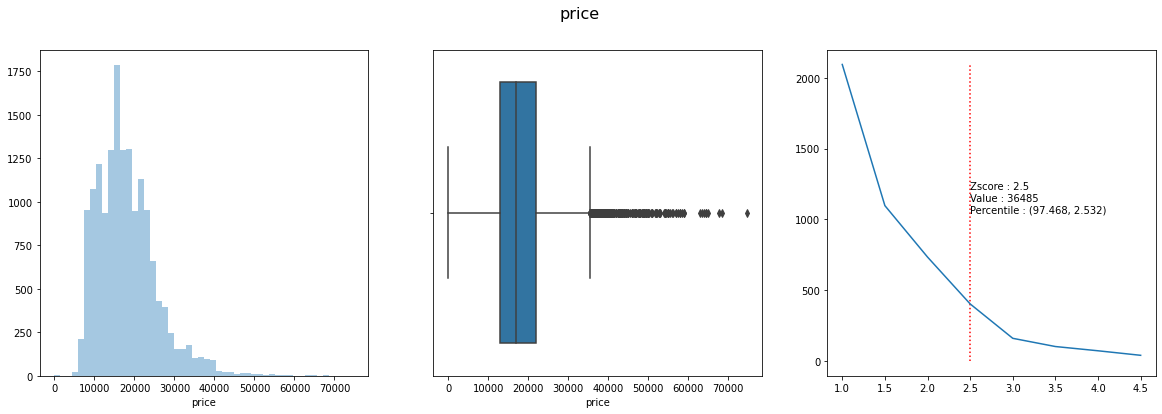

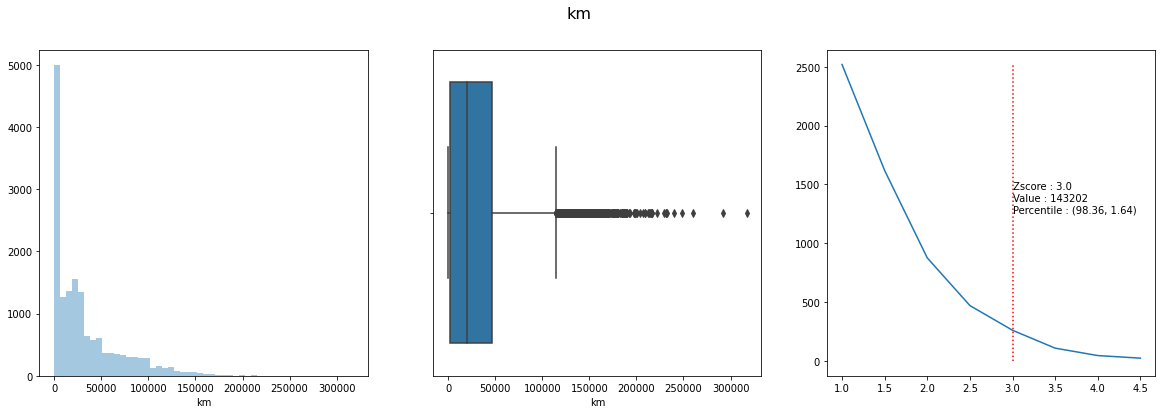

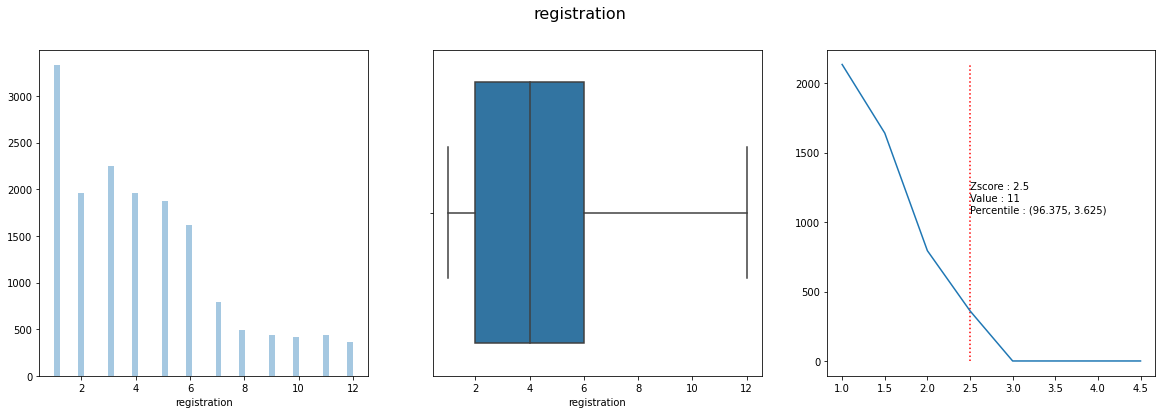

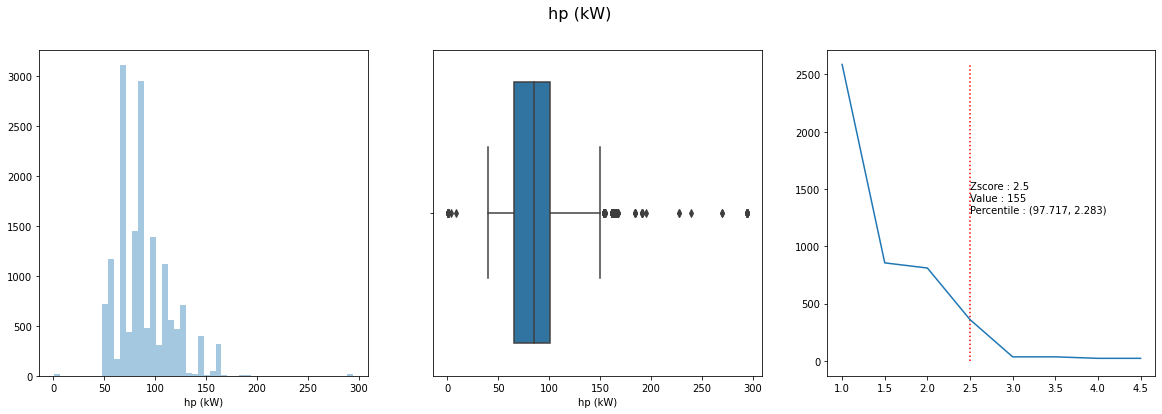

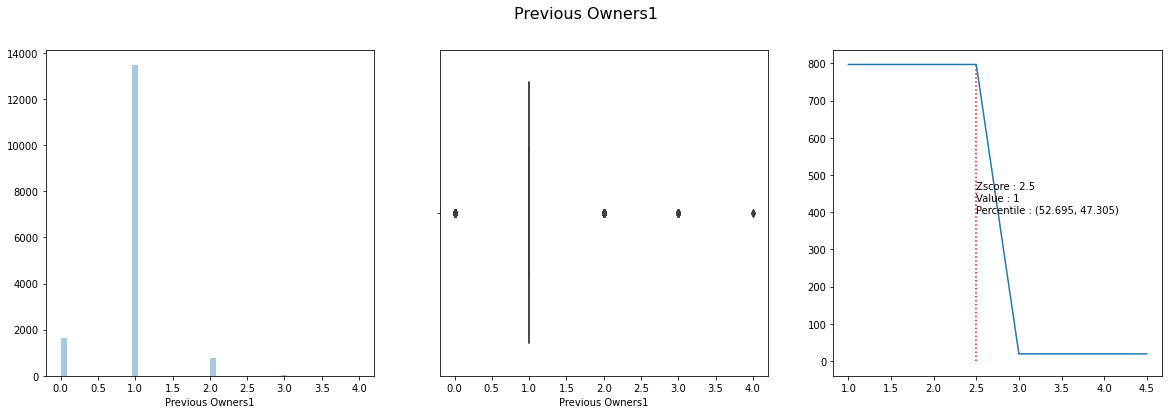

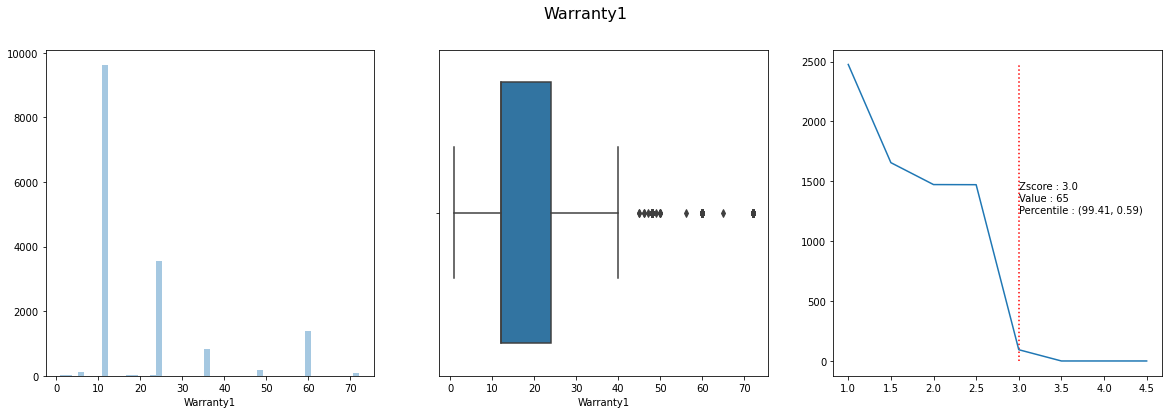

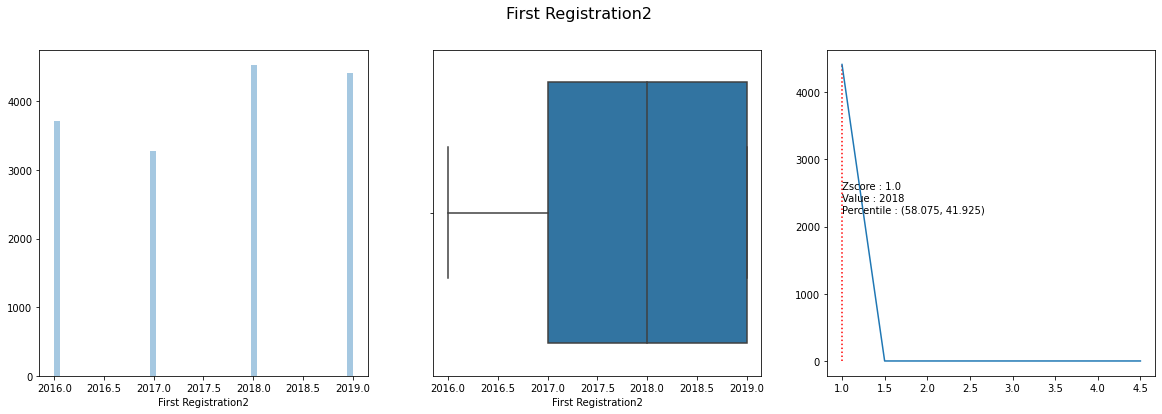

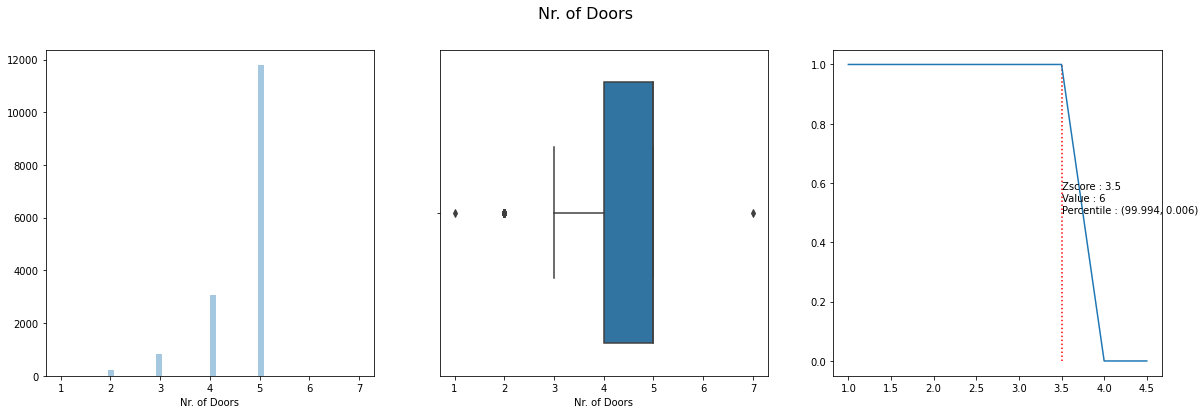

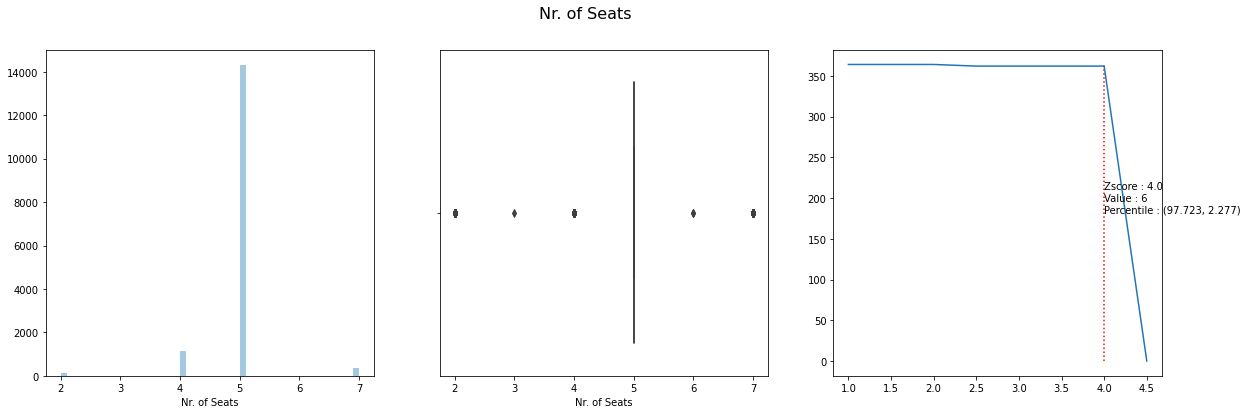

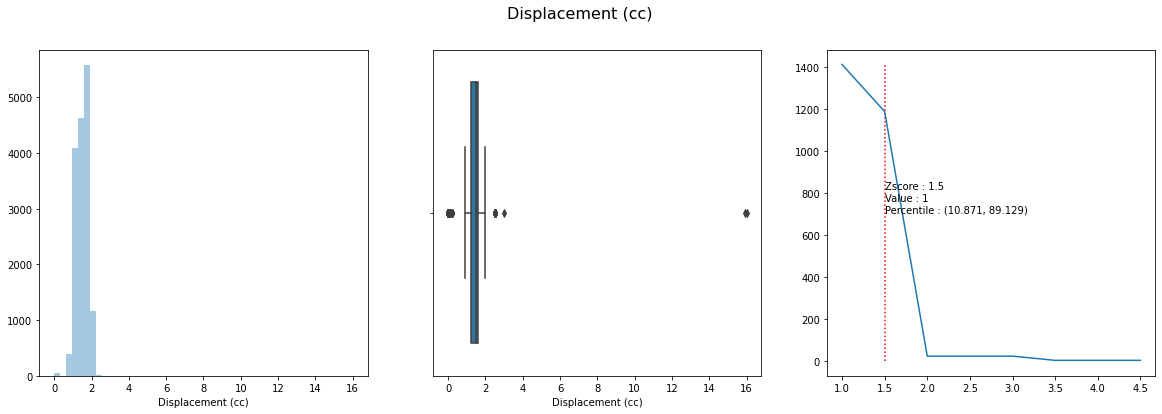

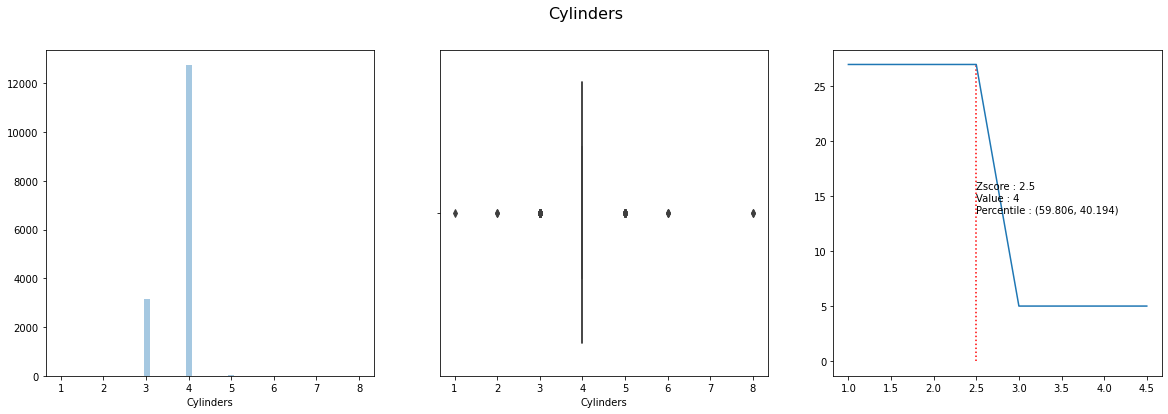

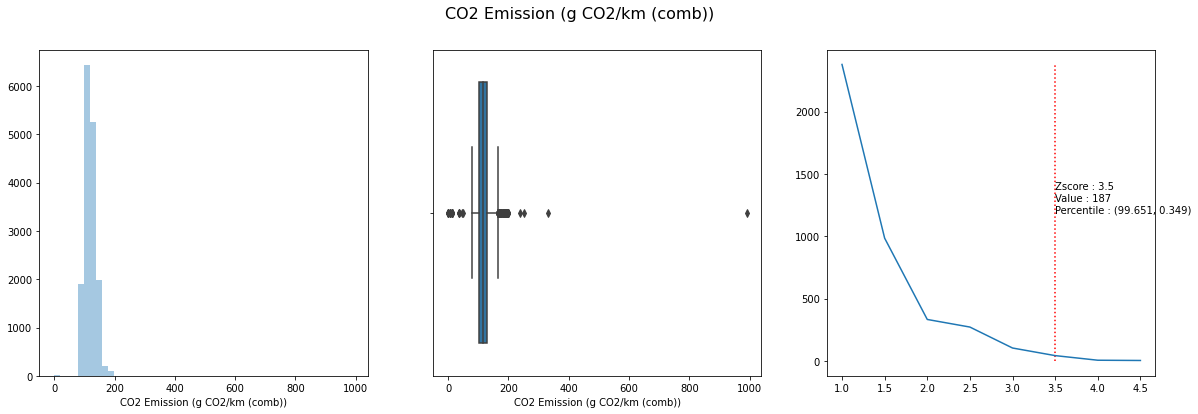

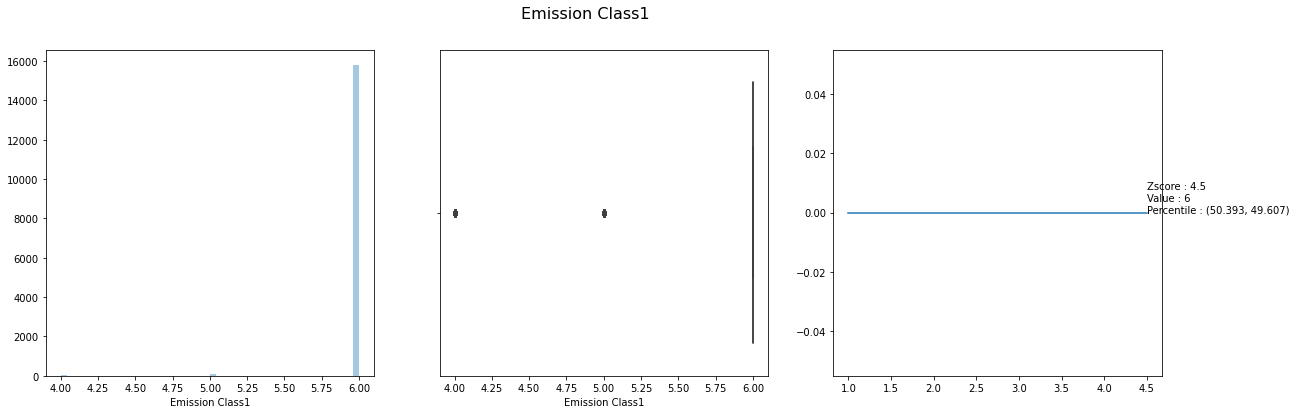

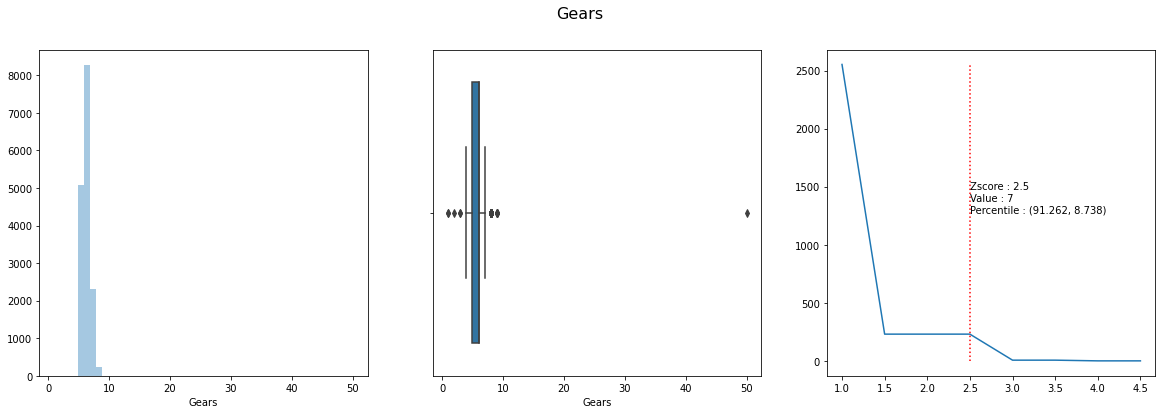

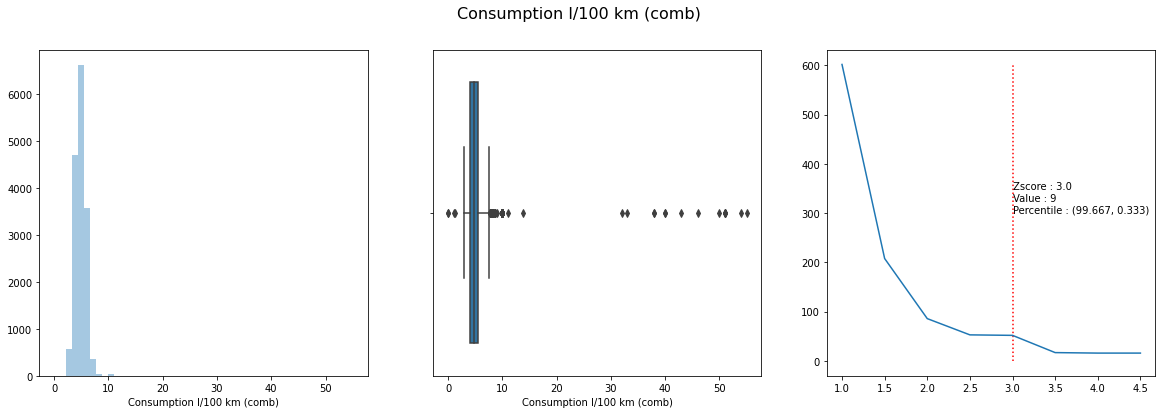

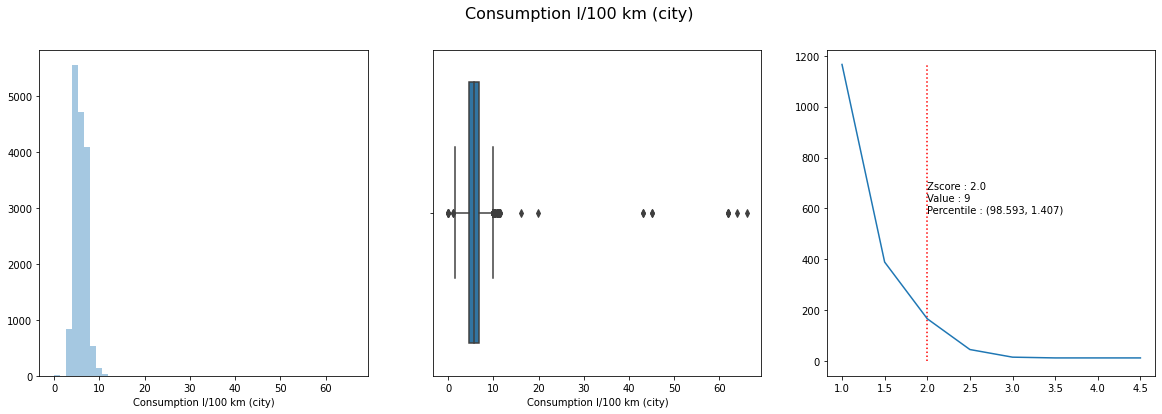

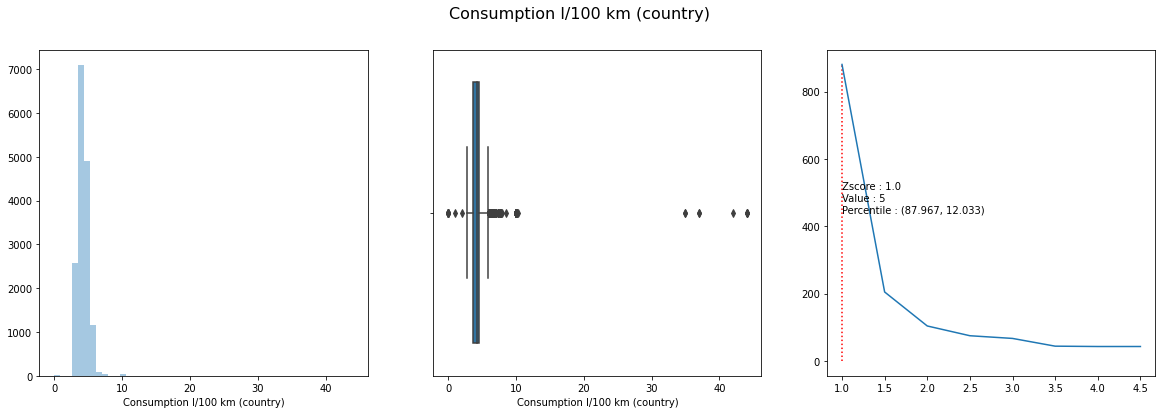

In [75]:
for col in non_dummy_col_list:
    outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [76]:
#cc = winsorize(ss, limits=[0.1, 0.2])
#list(cc)

In [77]:
#'price' we will analyze. for rest we can clip
non_dummy_col_list = [ 'km',
 'registration',
 'hp (kW)',
 'Previous Owners1',
 'Warranty1',
 'First Registration2',
 'Nr. of Doors',
 'Nr. of Seats',
 'Displacement (cc)',
 'Cylinders',
 'CO2 Emission (g CO2/km (comb))',
 'Emission Class1',
 'Gears',
 'Consumption l/100 km (comb)',
 'Consumption l/100 km (city)',
 'Consumption l/100 km (country)']

In [78]:
def clip_series(s, lower, upper):
    clipped = s.clip(lower=s.quantile(lower), upper=s.quantile(upper))
    return clipped

# Manage list of features to be winsorized
#feature_list = list(df.columns)
feature_list = non_dummy_col_list

for f in feature_list:
    df[f] = clip_series(df[f], 0.05, 0.95)

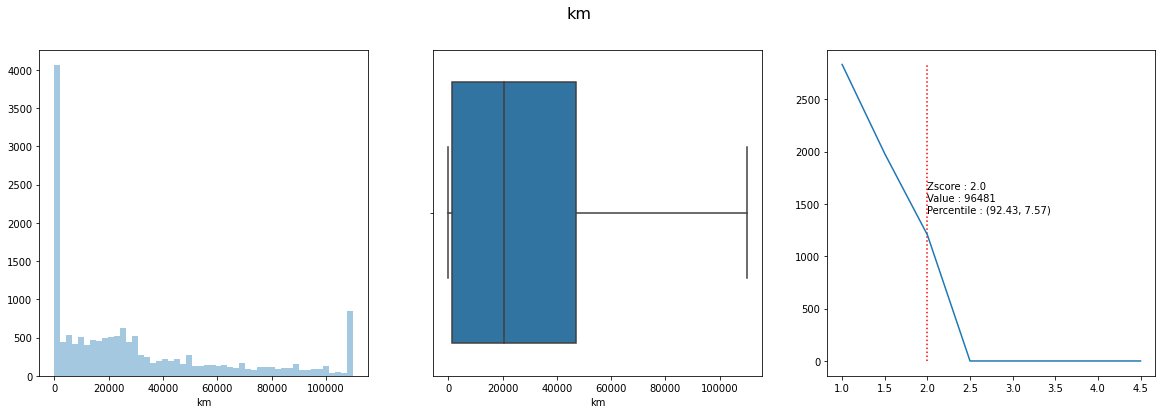

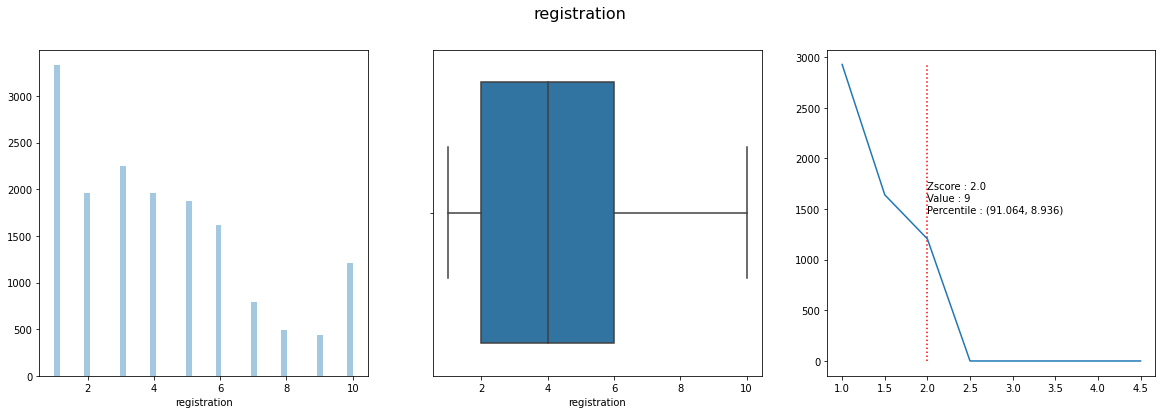

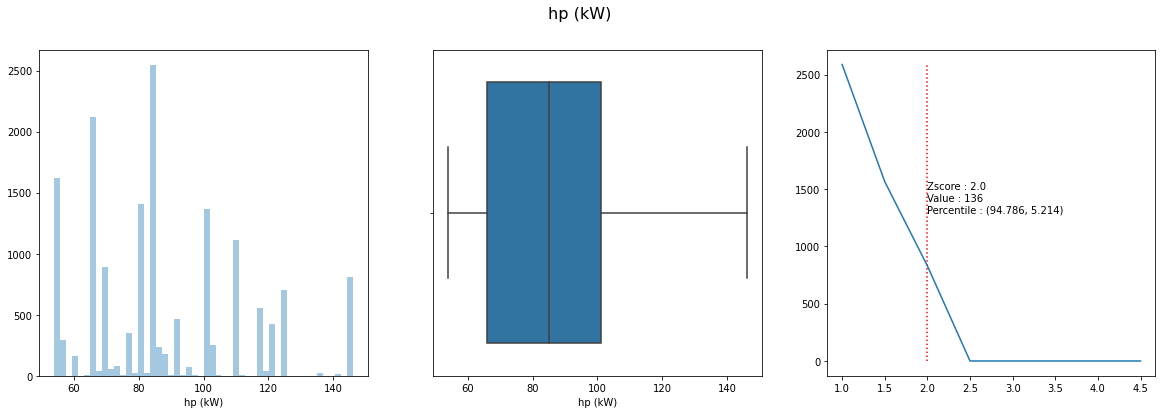

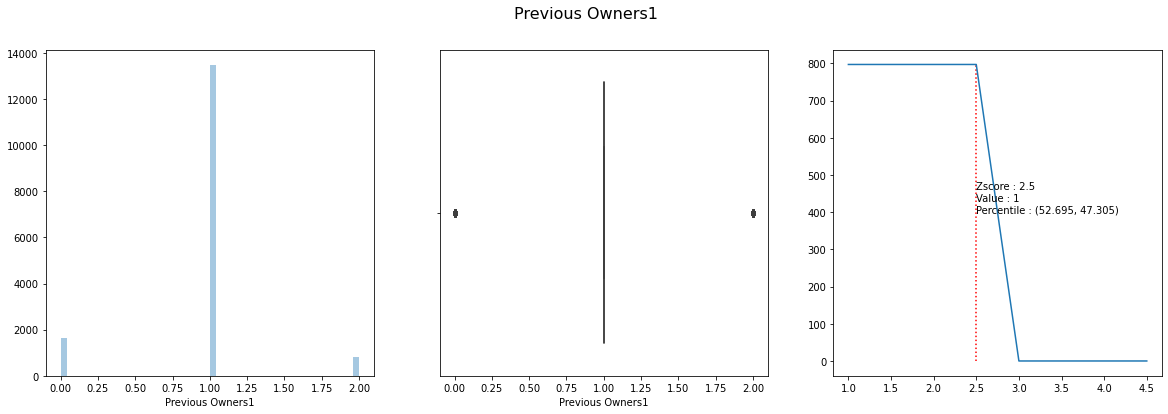

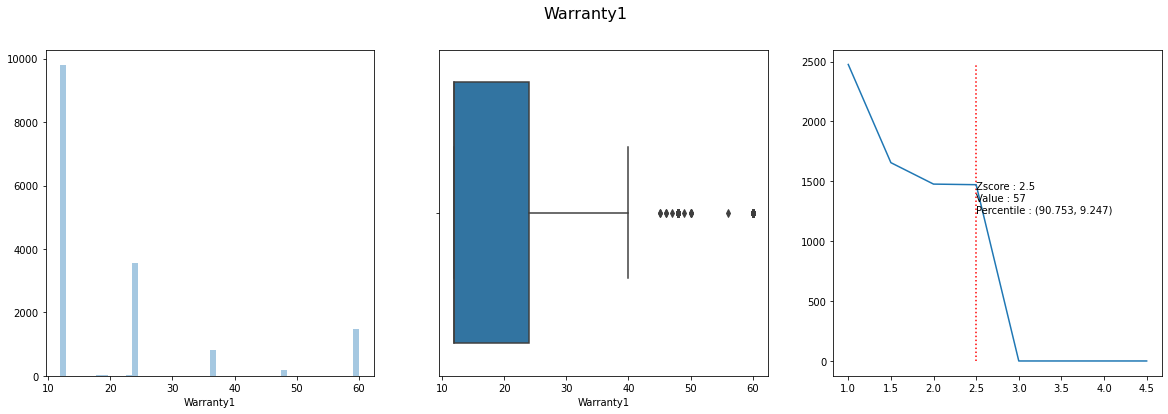

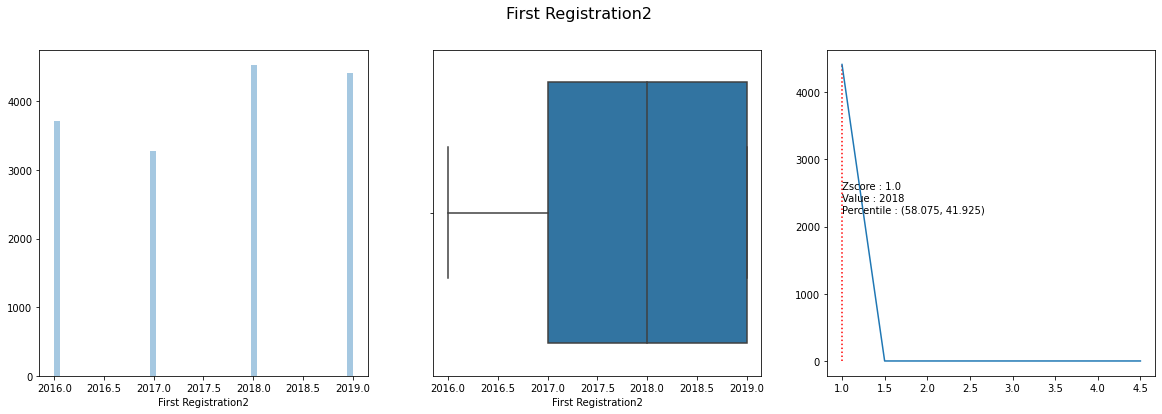

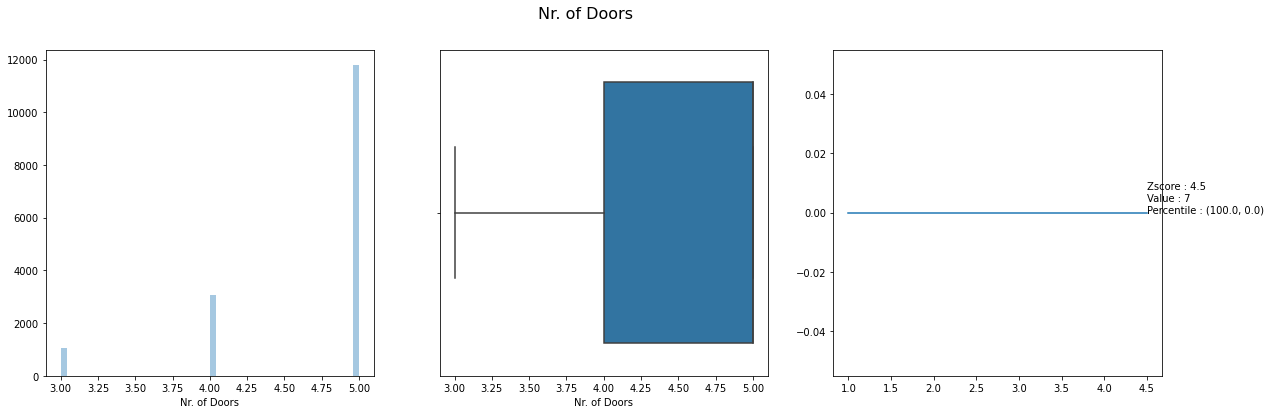

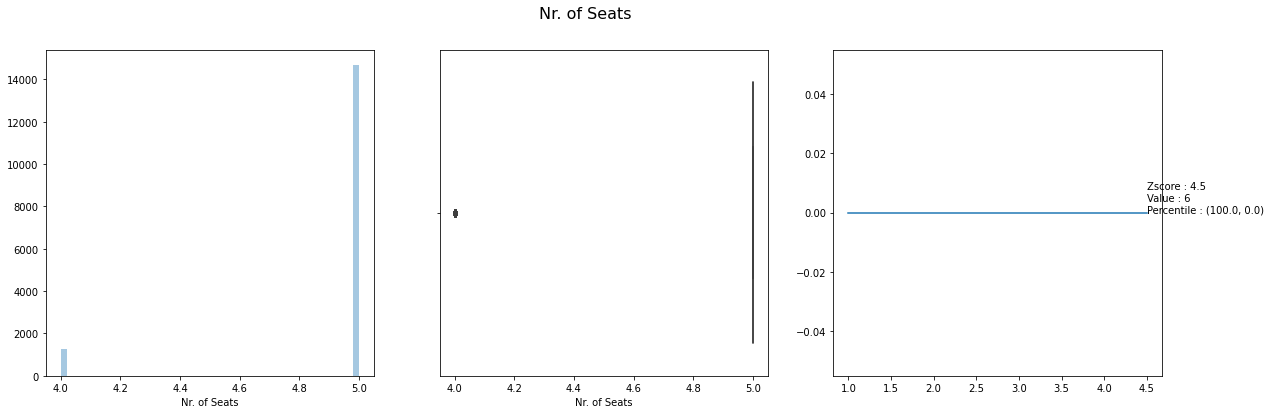

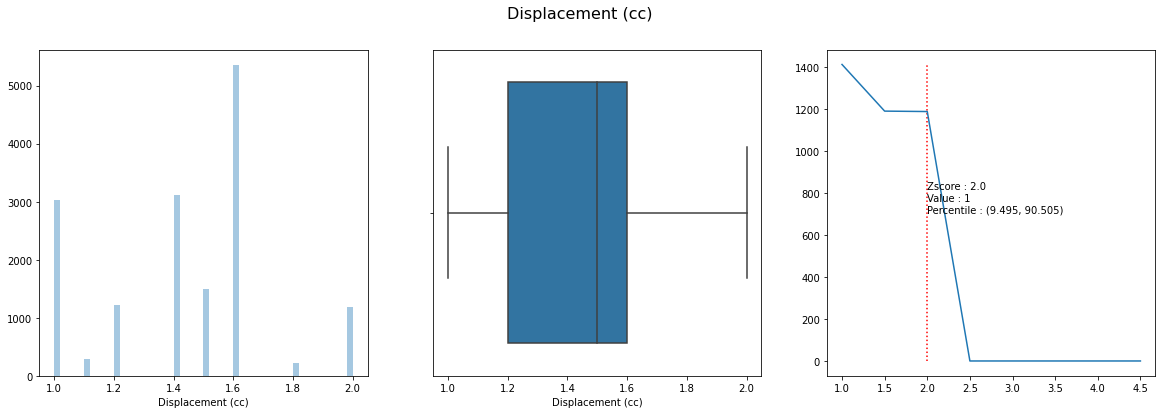

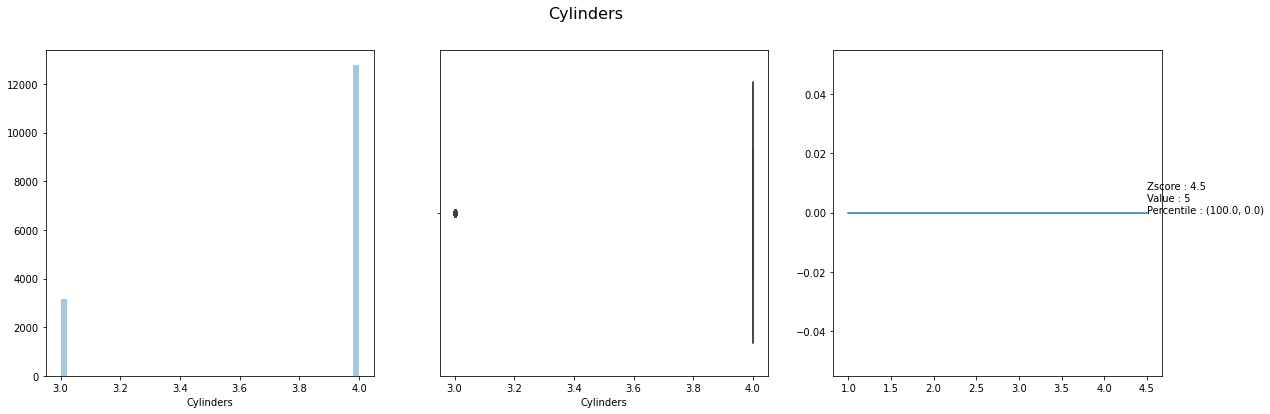

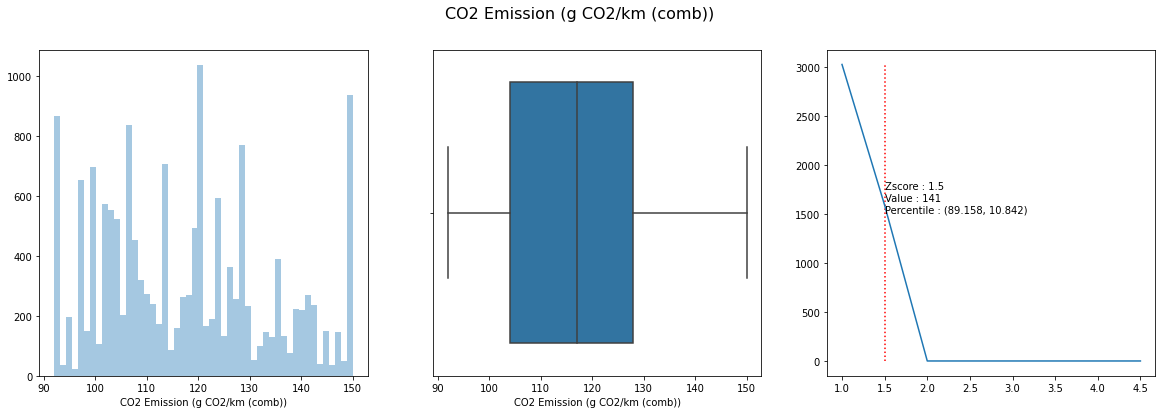

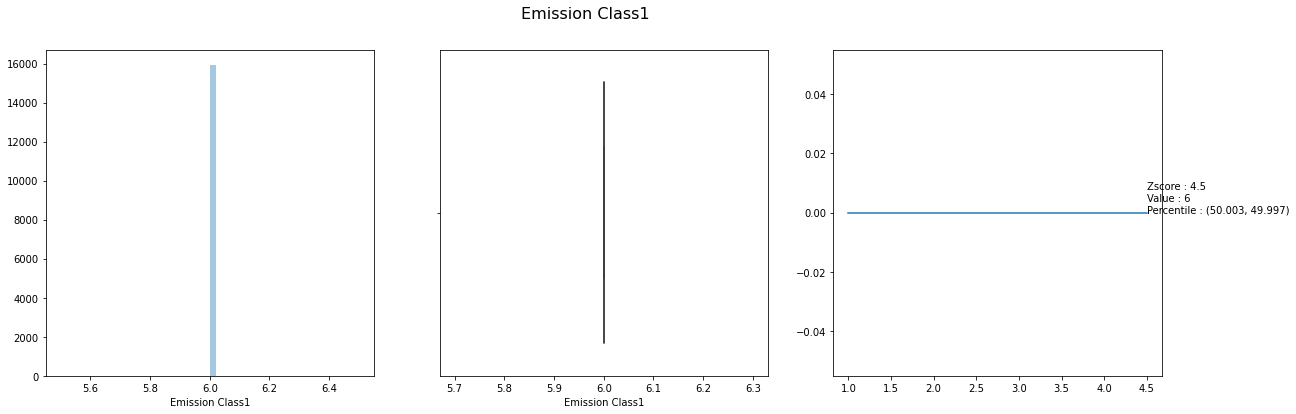

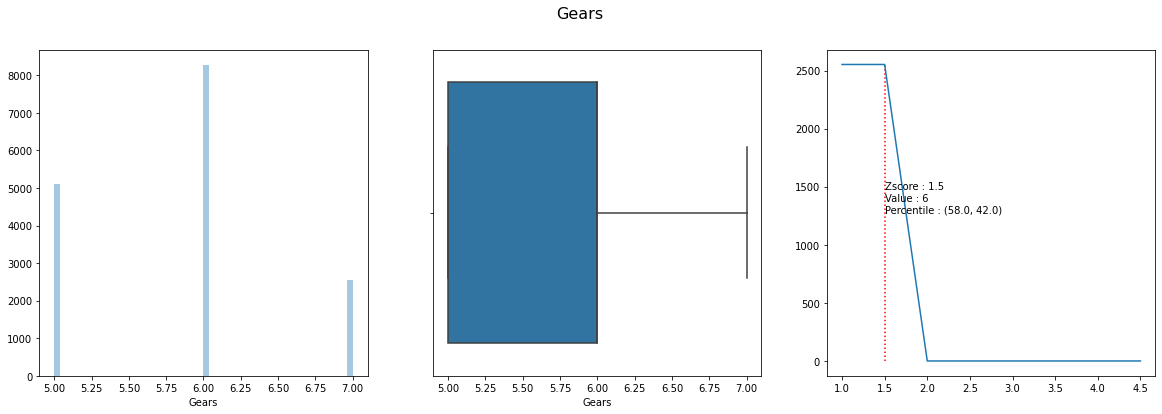

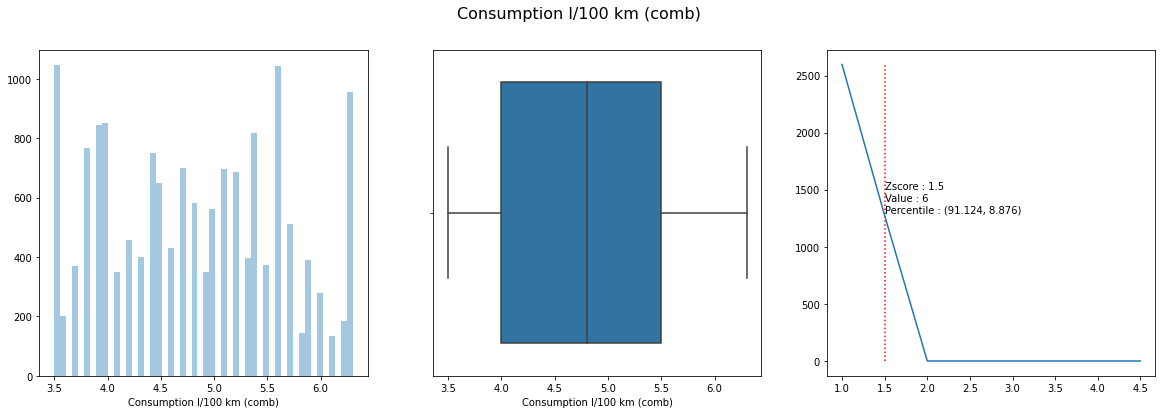

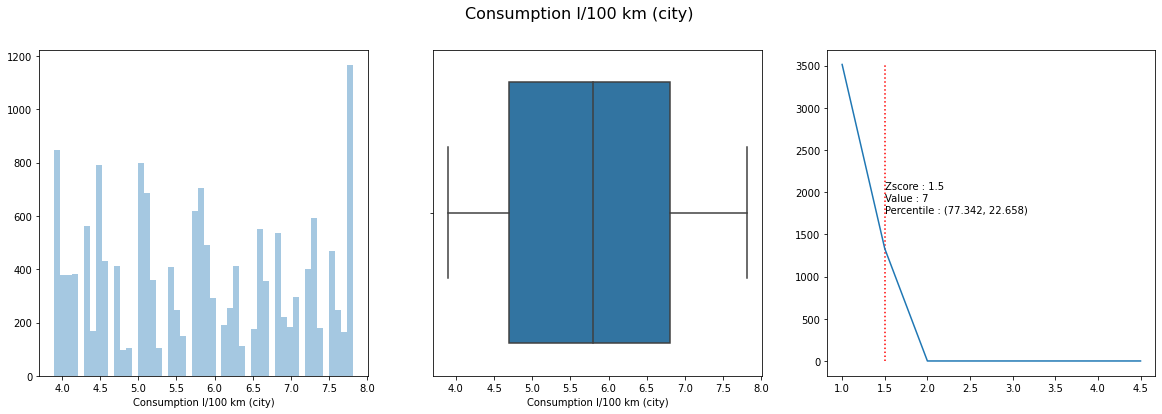

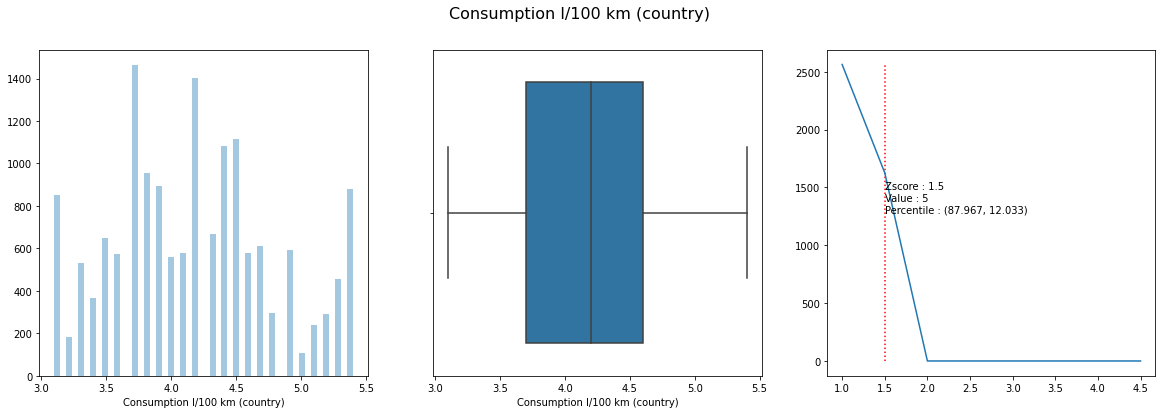

In [81]:
for col in non_dummy_col_list:
    outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [82]:
df["price"].value_counts().sort_index()

13       1
120      1
255      1
331      1
        ..
64900    1
67600    1
68320    1
74600    1
Name: price, Length: 2956, dtype: int64

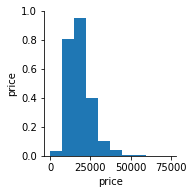

In [85]:
sns.pairplot(df[["price"]])

In [55]:
#dfstudy = dftemp[(dftemp["price"] < 8455) | (dftemp["price"] > 31989)  ]
#price ->31990.0  8454.5

In [87]:
pd.options.display.max_columns = 205
pd.options.display.max_rows = 8

In [64]:
#Delete rows that price is lower than 500Euros
#df.drop(df[df["price"]<500].index,inplace=True)

In [90]:
df[df["price"]<500].index

Int64Index([6066, 8594, 8828, 8829], dtype='int64')

In [93]:
df.at[[6066,8594,8828,8829], 'price'] = [14525,9429,15775,15775]

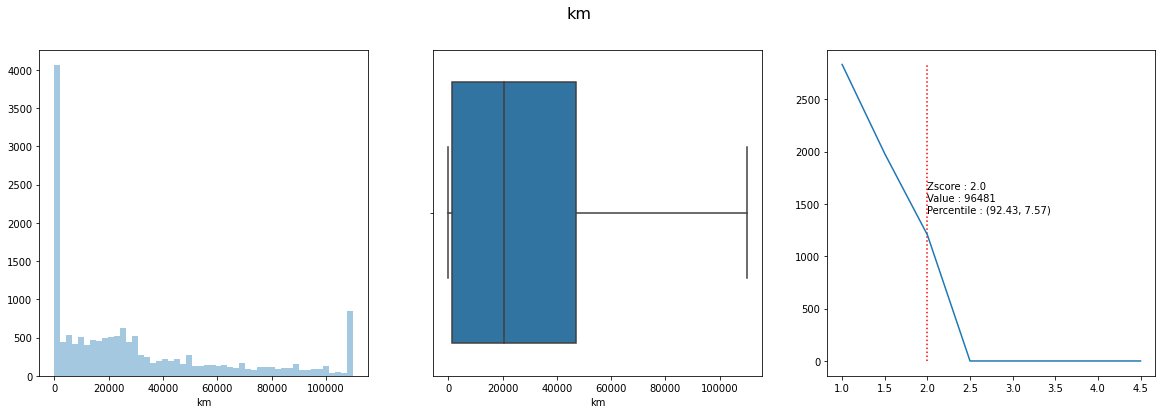

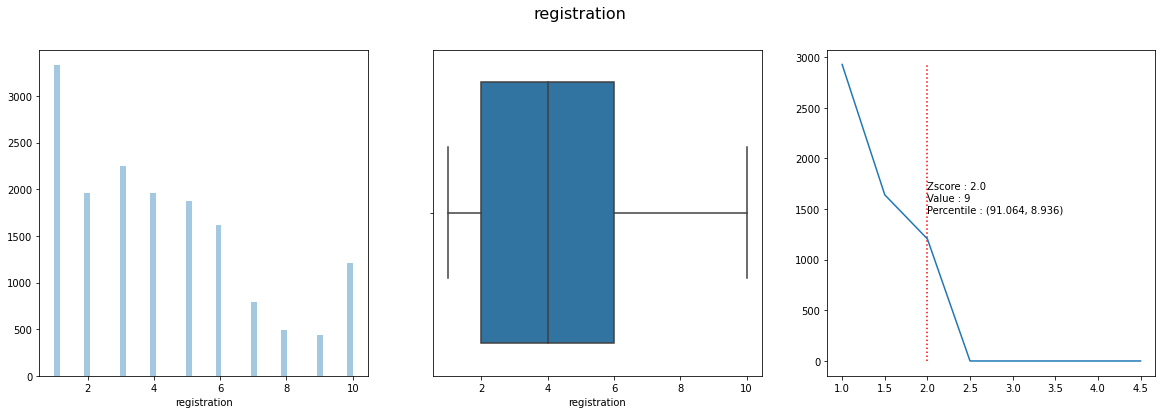

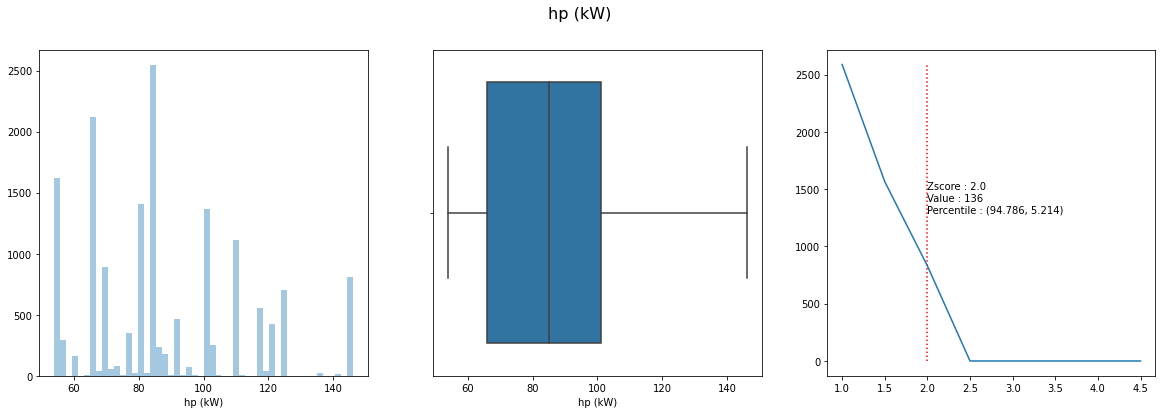

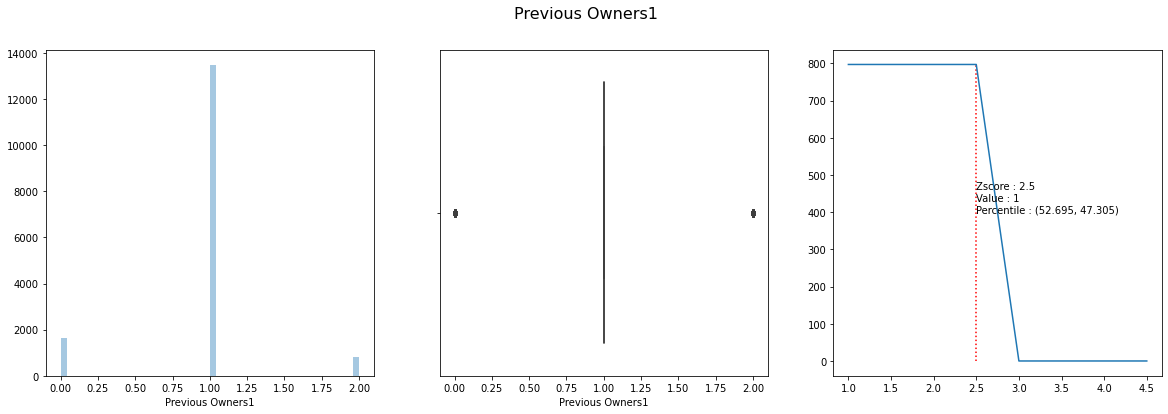

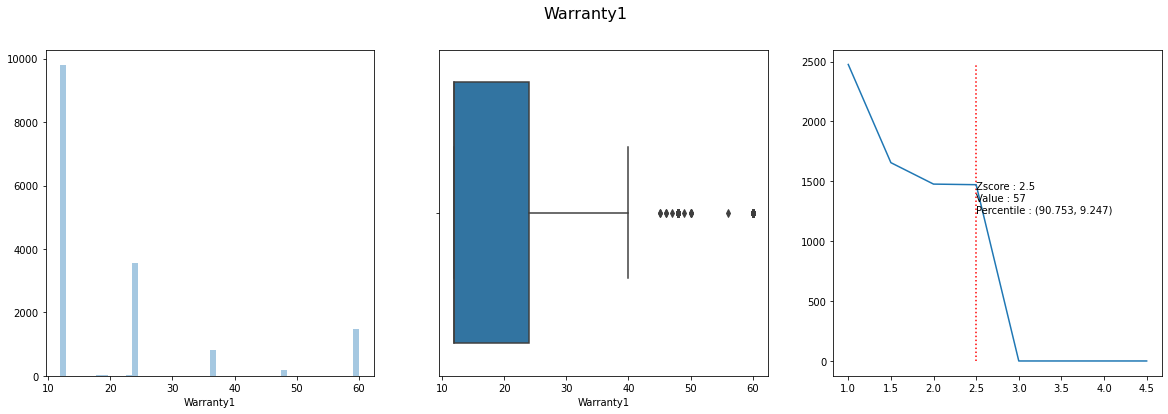

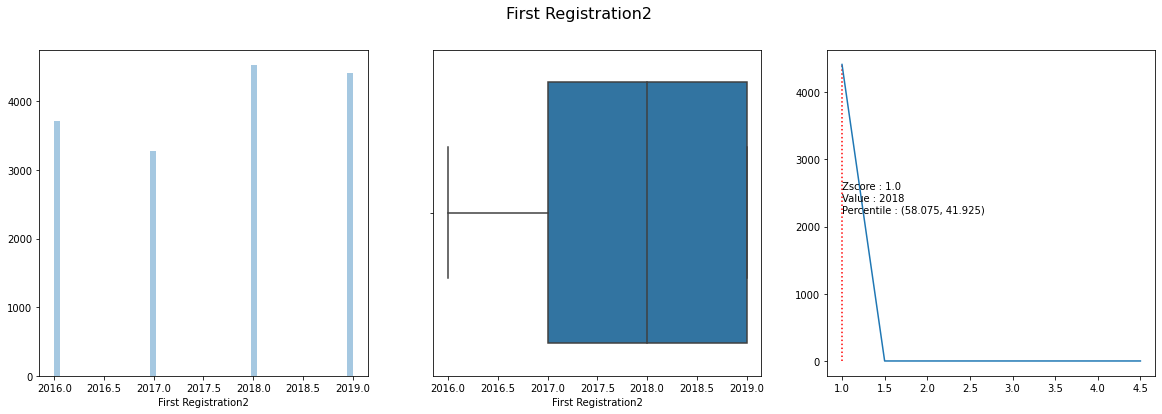

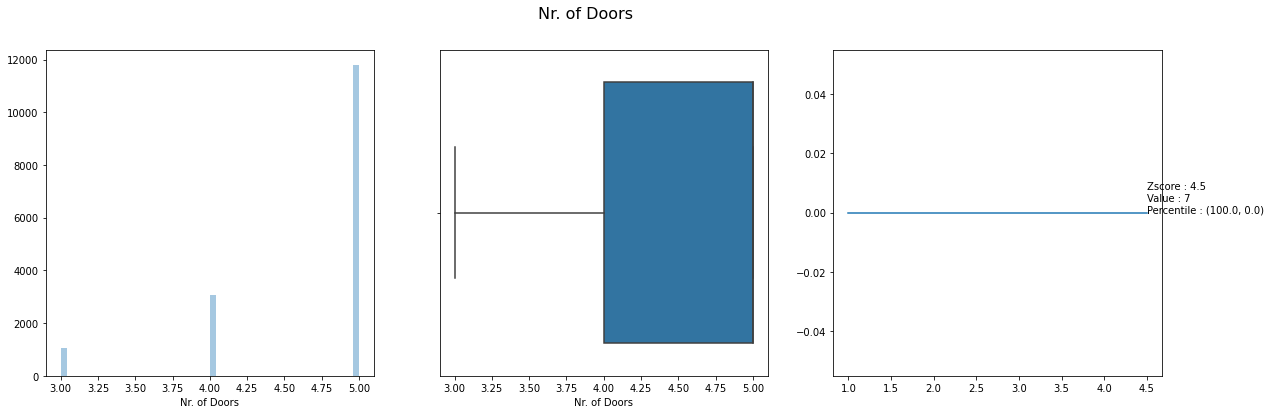

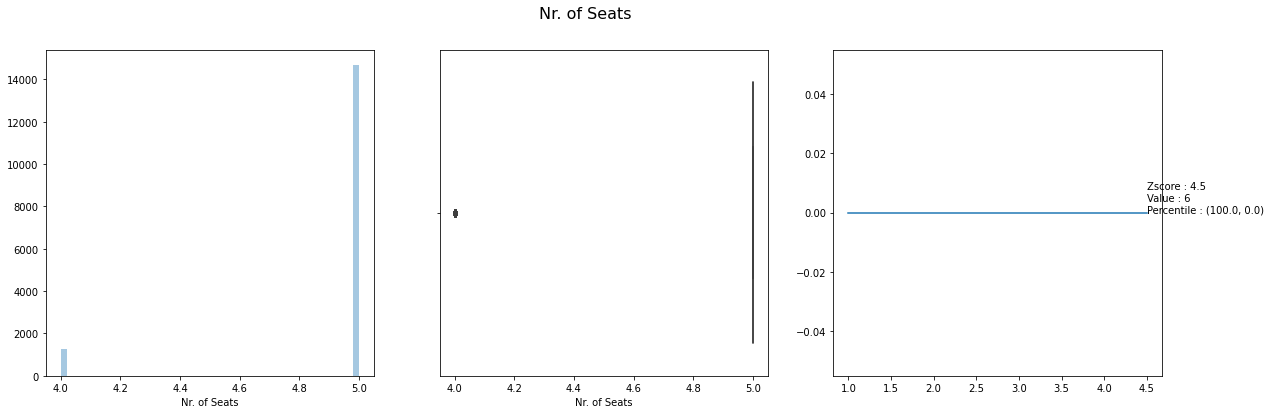

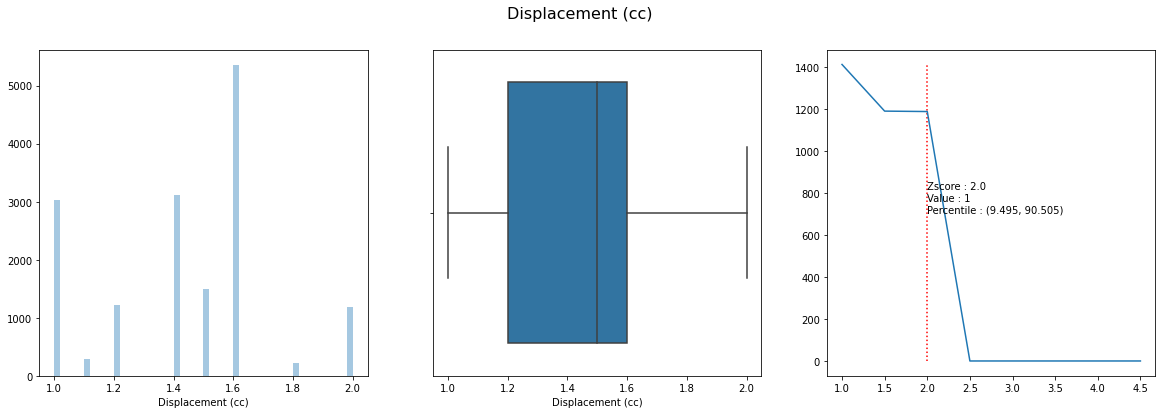

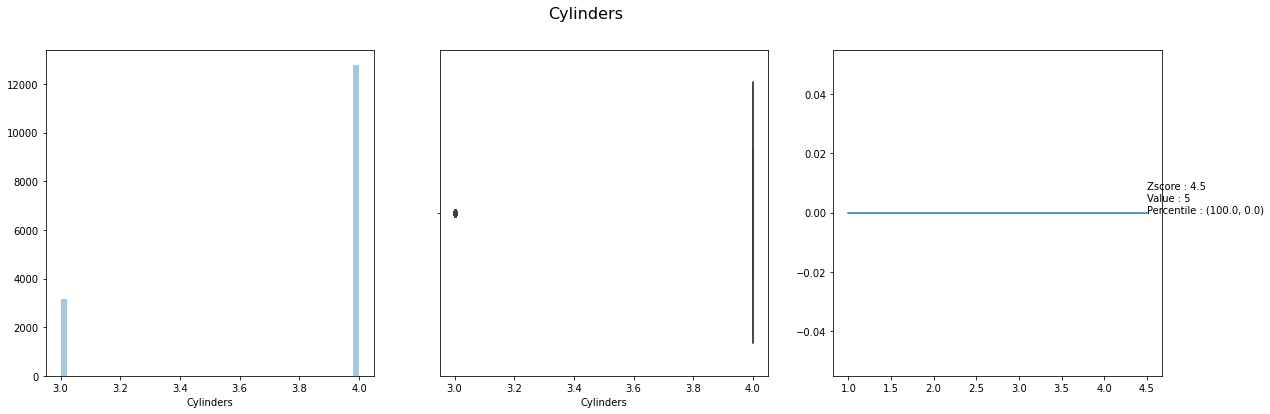

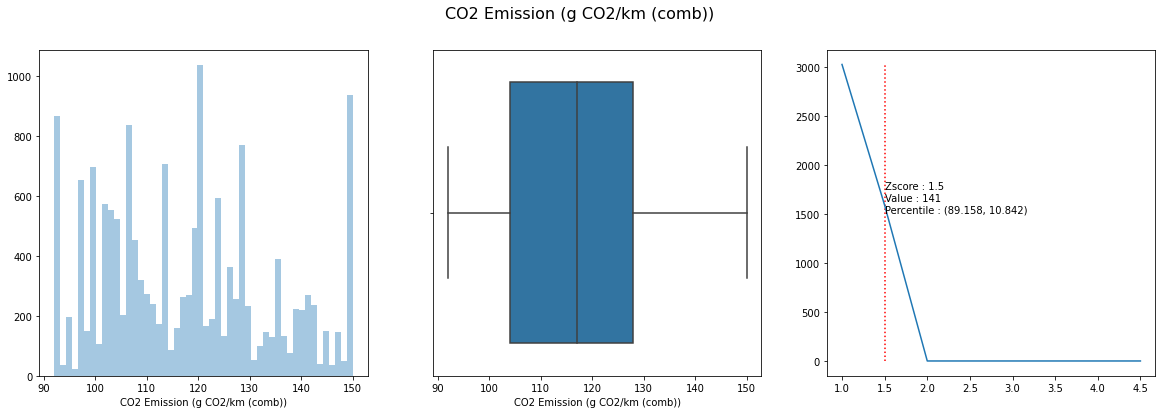

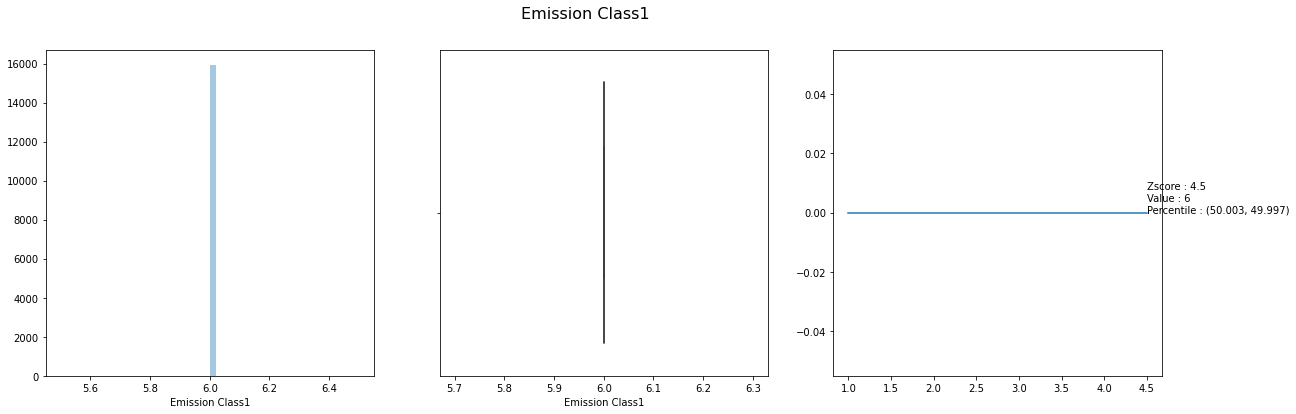

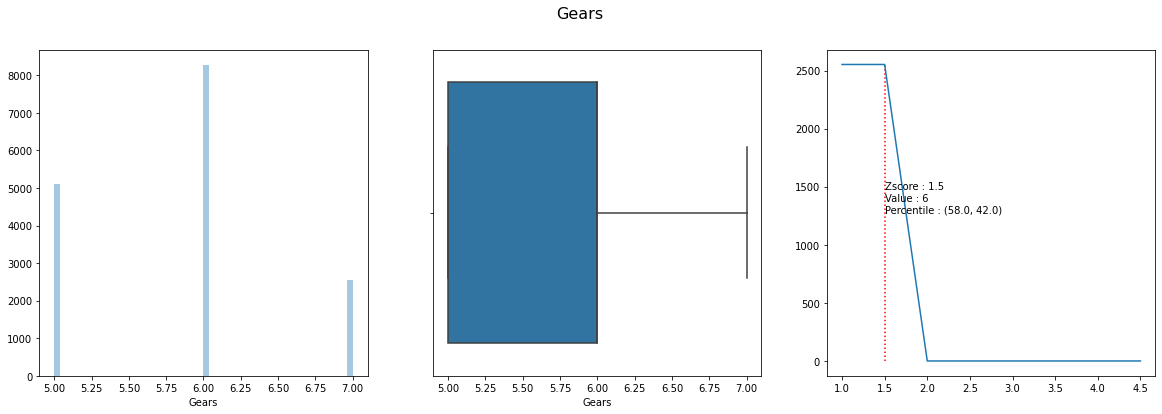

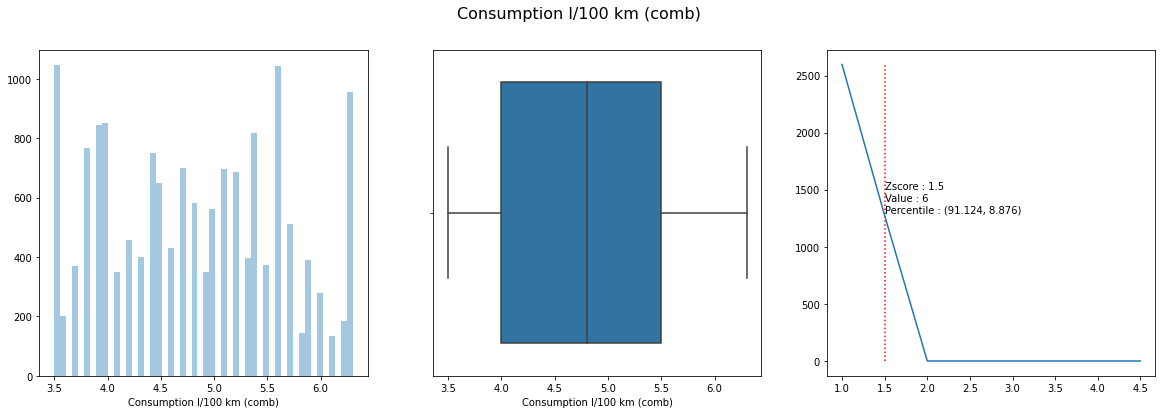

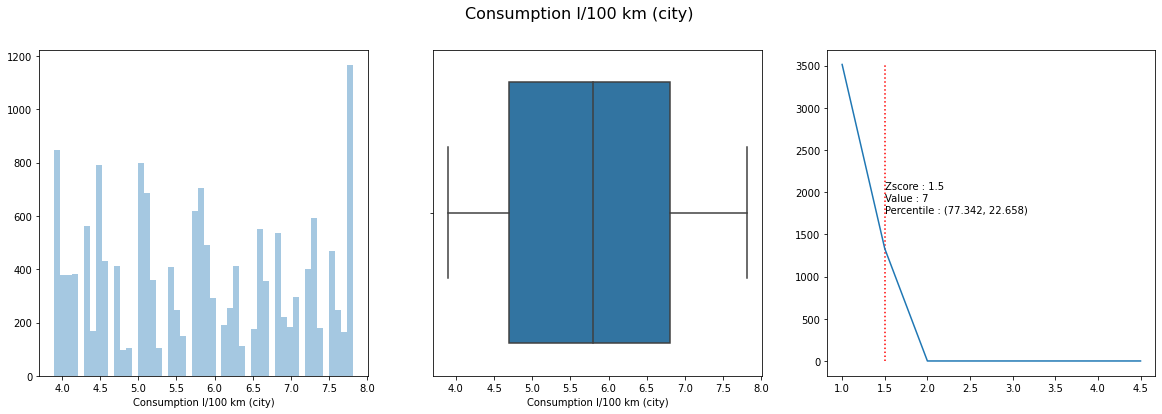

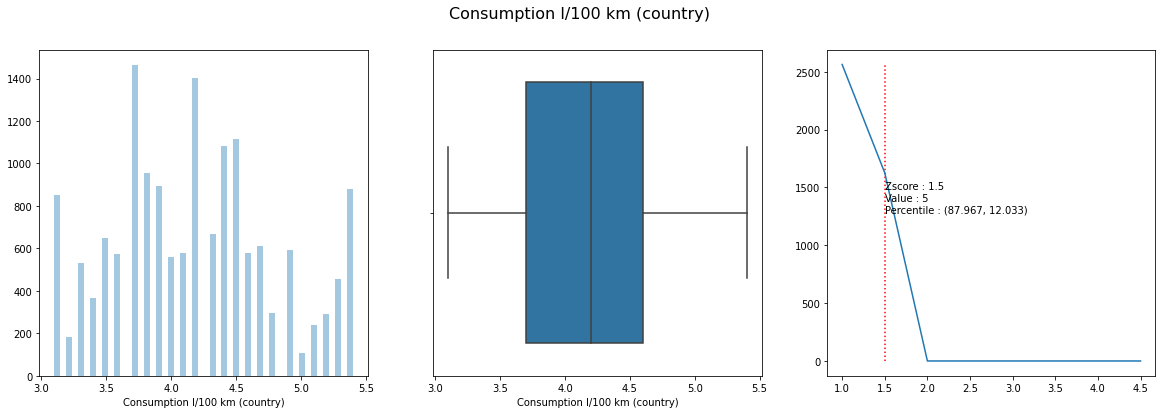

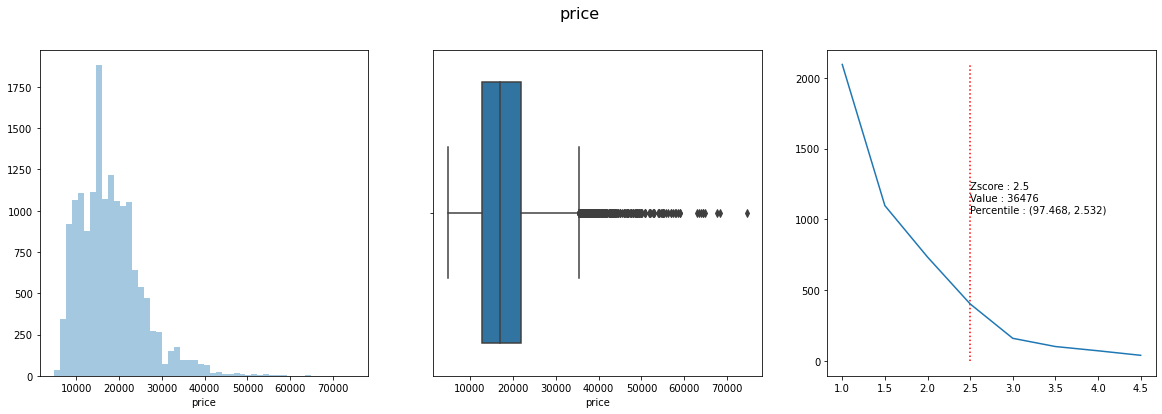

In [94]:
non_dummy_col_list.append("price")
for col in non_dummy_col_list:
    outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [100]:
list(df.columns)

['price',
 'km',
 'registration',
 'hp (kW)',
 'Comfort & Convenience 1 Air conditioning',
 'Comfort & Convenience 2 Air suspension',
 'Comfort & Convenience 3 Armrest',
 'Comfort & Convenience 4 Automatic climate control',
 'Comfort & Convenience 5 Auxiliary heating',
 'Comfort & Convenience 6 Cruise control',
 'Comfort & Convenience 7 Electric Starter',
 'Comfort & Convenience 8 Electric tailgate',
 'Comfort & Convenience 9 Electrical side mirrors',
 'Comfort & Convenience 10 Electrically adjustable seats',
 'Comfort & Convenience 11 Electrically heated windshield',
 'Comfort & Convenience 12 Heads-up display',
 'Comfort & Convenience 13 Heated steering wheel',
 'Comfort & Convenience 14 Hill Holder',
 'Comfort & Convenience 15 Keyless central door lock',
 'Comfort & Convenience 16 Leather seats',
 'Comfort & Convenience 17 Leather steering wheel',
 'Comfort & Convenience 18 Light sensor',
 'Comfort & Convenience 19 Lumbar support',
 'Comfort & Convenience 20 Massage seats',
 'Comfor

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Columns: 203 entries, price to alcantara
dtypes: float64(6), int64(197)
memory usage: 24.7 MB


In [96]:
df.shape

(15919, 203)

In [102]:
df

,price,km,registration,hp (kW),Comfort & Convenience 1 Air conditioning,Comfort & Convenience 2 Air suspension,Comfort & Convenience 3 Armrest,Comfort & Convenience 4 Automatic climate control,Comfort & Convenience 5 Auxiliary heating,Comfort & Convenience 6 Cruise control,Comfort & Convenience 7 Electric Starter,Comfort & Convenience 8 Electric tailgate,Comfort & Convenience 9 Electrical side mirrors,Comfort & Convenience 10 Electrically adjustable seats,Comfort & Convenience 11 Electrically heated windshield,Comfort & Convenience 12 Heads-up display,Comfort & Convenience 13 Heated steering wheel,Comfort & Convenience 14 Hill Holder,Comfort & Convenience 15 Keyless central door lock,Comfort & Convenience 16 Leather seats,Comfort & Convenience 17 Leather steering wheel,Comfort & Convenience 18 Light sensor,Comfort & Convenience 19 Lumbar support,Comfort & Convenience 20 Massage seats,Comfort & Convenience 21 Multi-function steering wheel,Comfort & Convenience 22 Navigation system,Comfort & Convenience 23 Panorama roof,Comfort & Convenience 24 Park Distance Control,Comfort & Convenience 25 Parking assist system camera,Comfort & Convenience 26 Parking assist system self-steering,Comfort & Convenience 27 Parking assist system sensors front,Comfort & Convenience 28 Parking assist system sensors rear,Comfort & Convenience 29 Power windows,Comfort & Convenience 30 Rain sensor,Comfort & Convenience 31 Seat heating,Comfort & Convenience 32 Seat ventilation,Comfort & Convenience 33 Split rear seats,Comfort & Convenience 34 Start-stop system,Comfort & Convenience 35 Sunroof,Comfort & Convenience 36 Tinted windows,Comfort & Convenience 37 Wind deflector,Comfort & Convenience 38 Windshield,Safety & Security 1 ABS,Safety & Security 2 Adaptive Cruise Control,Safety & Security 3 Adaptive headlights,Safety & Security 4 Alarm system,Safety & Security 5 Blind spot monitor,Safety & Security 6 Central door lock,Safety & Security 7 Central door lock with remote control,Safety & Security 8 Daytime running lights,Safety & Security 9 Driver drowsiness detection,Safety & Security 10 Driver-side airbag,Safety & Security 11 Electronic stability control,Safety & Security 12 Emergency brake assistant,Safety & Security 13 Emergency system,Safety & Security 14 Fog lights,Safety & Security 15 Head airbag,Safety & Security 16 Immobilizer,Safety & Security 17 Isofix,Safety & Security 18 LED Daytime Running Lights,Safety & Security 19 LED Headlights,Safety & Security 20 Lane departure warning system,Safety & Security 21 Night view assist,Safety & Security 22 Passenger-side airbag,Safety & Security 23 Power steering,Safety & Security 24 Rear airbag,Safety & Security 25 Side airbag,Safety & Security 26 Tire pressure monitoring system,Safety & Security 27 Traction control,Safety & Security 28 Traffic sign recognition,Safety & Security 29 Xenon headlights,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres,Entertainment & Media 1 Bluetooth,Entertainment & Media 2 CD player,Entertainment & Media 3 Digital radio,Entertainment & Media 4 Hands-free equipment,Entertainment & Media 5 MP3,Entertainment & Media 6 On-board computer,Entertainment & Media 7 Radio,Entertainment & Media 8 Sound system,Entertainment & Media 9 Television,Entertainment & Media 10 USB,Previous Owners1,Warranty1,First Registration2,Nr. of Doors,Nr. of Seats,Displacement (cc),Cylinders,CO2 Emission (g CO2/km (comb)),Emission Class1,Gears,Consumption l/100 km (comb),Consumption l/100 km (city),Consumption l/100 km (country),Fuel2_Diesel,Fuel2_Electric,Fuel2_Electric/Gasoline,Fuel2_Gasoline,Fuel2_Others,Fuel2_gas,make_model_Audi A1,make_model_Audi A2,make_mode

In [105]:
#change column names before export
good_names = ['price', 'km', 'registration', 'hp_kw', 'comfort_convenience_air_conditioning', 'comfort_convenience_air_suspension', 'comfort_convenience_armrest', 'comfort_convenience_automatic_climate_control', 'comfort_convenience_auxiliary_heating', 'comfort_convenience_cruise_control', 'comfort_convenience_electric_starter', 'comfort_convenience_electric_tailgate', 'comfort_convenience_electrical_side_mirrors', 'comfort_convenience_electrically_adjustable_seats', 'comfort_convenience_electrically_heated_windshield', 'comfort_convenience_heads_up_display', 'comfort_convenience_heated_steering_wheel', 'comfort_convenience_hill_holder', 'comfort_convenience_keyless_central_door_lock', 'comfort_convenience_leather_seats', 'comfort_convenience_leather_steering_wheel', 'comfort_convenience_light_sensor', 'comfort_convenience_lumbar_support', 'comfort_convenience_massage_seats', 'comfort_convenience_multi_function_steering_wheel', 'comfort_convenience_navigation_system', 'comfort_convenience_panorama_roof', 'comfort_convenience_park_distance_control', 'comfort_convenience_parking_assist_system_camera', 'comfort_convenience_parking_assist_system_self_steering', 'comfort_convenience_parking_assist_system_sensors_front', 'comfort_convenience_parking_assist_system_sensors_rear', 'comfort_convenience_power_windows', 'comfort_convenience_rain_sensor', 'comfort_convenience_seat_heating', 'comfort_convenience_seat_ventilation', 'comfort_convenience_split_rear_seats', 'comfort_convenience_start_stop_system', 'comfort_convenience_sunroof', 'comfort_convenience_tinted_windows', 'comfort_convenience_wind_deflector', 'comfort_convenience_windshield', 'safety_security_abs', 'safety_security_adaptive_cruise_control', 'safety_security_adaptive_headlights', 'safety_security_alarm_system', 'safety_security_blind_spot_monitor', 'safety_security_central_door_lock', 'safety_security_central_door_lock_with_remote_control', 'safety_security_daytime_running_lights', 'safety_security_driver_drowsiness_detection', 'safety_security_driver_side_airbag', 'safety_security_electronic_stability_control', 'safety_security_emergency_brake_assistant', 'safety_security_emergency_system', 'safety_security_fog_lights', 'safety_security_head_airbag', 'safety_security_immobilizer', 'safety_security_isofix', 'safety_security_led_daytime_running_lights', 'safety_security_led_headlights', 'safety_security_lane_departure_warning_system', 'safety_security_night_view_assist', 'safety_security_passenger_side_airbag', 'safety_security_power_steering', 'safety_security_rear_airbag', 'safety_security_side_airbag', 'safety_security_tire_pressure_monitoring_system', 'safety_security_traction_control', 'safety_security_traffic_sign_recognition', 'safety_security_xenon_headlights', 'extras_alloy_wheels', 'extras_cab_or_rented_car', 'extras_catalytic_converter', 'extras_handicapped_enabled', 'extras_right_hand_drive', 'extras_roof_rack', 'extras_shift_paddles', 'extras_ski_bag', 'extras_sliding_door', 'extras_sport_package', 'extras_sport_seats', 'extras_sport_suspension', 'extras_touch_screen', 'extras_trailer_hitch', 'extras_tuned_car', 'extras_voice_control', 'extras_winter_tyres', 'entertainment_media_bluetooth', 'entertainment_media_cd_player', 'entertainment_media_digital_radio', 'entertainment_media_hands_free_equipment', 'entertainment_media_mp3', 'entertainment_media_on_board_computer', 'entertainment_media_radio', 'entertainment_media_sound_system', 'entertainment_media_television', 'entertainment_media_usb', 'previous_owners', 'warranty', 'first_registration', 'nr_of_doors', 'nr_of_seats', 'displacement_cc', 'cylinders', 'co2_emission_g_co2_km_comb', 'emission_class', 'gears', 'consumption_l_100km_comb', 'consumption_l_100km_city', 'consumption_l_100km_country', 'fuel_diesel', 'fuel_electric', 'fuel_electric/gasoline', 'fuel_gasoline', 'fuel_others', 'fuel_gas', 'make_model_audi_a1', 'make_model_audi_a2', 'make_model_audi_a3', 'make_model_opel_astra', 'make_model_opel_corsa', 'make_model_opel_insignia', 'make_model_renault_clio', 'make_model_renault_duster', 'make_model_renault_espace', 'body_type_compact', 'body_type_convertible', 'body_type_coupe', 'body_type_off_road', 'body_type_other', 'body_type_sedans', 'body_type_station_wagon', 'body_type_transporter', 'body_type_van', 'vat_price_negotiable', 'vat_vat_deductible', 'country_version_austria', 'country_version_belgium', 'country_version_bulgaria', 'country_version_croatia', 'country_version_czech_republic', 'country_version_denmark', 'country_version_egypt', 'country_version_european_union', 'country_version_france', 'country_version_germany', 'country_version_hungary', 'country_version_italy', 'country_version_japan', 'country_version_luxembourg', 'country_version_netherlands', 'country_version_poland', 'country_version_romania', 'country_version_serbia', 'country_version_slovakia', 'country_version_slovenia', 'country_version_spain', 'country_version_sweden', 'country_version_switzerland', 'drive_chain_4wd', 'drive_chain_front', 'drive_chain_rear', 'gearing_type_automatic', 'gearing_type_manual', 'gearing_type_semi_automatic', 'paint_type_metallic', 'paint_type_perl_effect', 'paint_type_uni/basic', 'body_color_beige', 'body_color_black', 'body_color_blue', 'body_color_bronze', 'body_color_brown', 'body_color_gold', 'body_color_green', 'body_color_grey', 'body_color_orange', 'body_color_red', 'body_color_silver', 'body_color_violet', 'body_color_white', 'body_color_yellow', 'type_demonstration', "type_employee's_car", 'type_new', 'type_pre_registered', 'type_used', 'beige', 'black', 'blue', 'brown', 'cloth', 'full_leather', 'grey', 'orange', 'other', 'part_leather', 'red', 'velour', 'white', 'yellow', 'alcantara']
df.columns = good_names
df

,price,km,registration,hp_kw,comfort_convenience_air_conditioning,comfort_convenience_air_suspension,comfort_convenience_armrest,comfort_convenience_automatic_climate_control,comfort_convenience_auxiliary_heating,comfort_convenience_cruise_control,comfort_convenience_electric_starter,comfort_convenience_electric_tailgate,comfort_convenience_electrical_side_mirrors,comfort_convenience_electrically_adjustable_seats,comfort_convenience_electrically_heated_windshield,comfort_convenience_heads_up_display,comfort_convenience_heated_steering_wheel,comfort_convenience_hill_holder,comfort_convenience_keyless_central_door_lock,comfort_convenience_leather_seats,comfort_convenience_leather_steering_wheel,comfort_convenience_light_sensor,comfort_convenience_lumbar_support,comfort_convenience_massage_seats,comfort_convenience_multi_function_steering_wheel,comfort_convenience_navigation_system,comfort_convenience_panorama_roof,comfort_convenience_park_distance_control,comfort_convenience_parking_assist_system_camera,comfort_convenience_parking_assist_system_self_steering,comfort_convenience_parking_assist_system_sensors_front,comfort_convenience_parking_assist_system_sensors_rear,comfort_convenience_power_windows,comfort_convenience_rain_sensor,comfort_convenience_seat_heating,comfort_convenience_seat_ventilation,comfort_convenience_split_rear_seats,comfort_convenience_start_stop_system,comfort_convenience_sunroof,comfort_convenience_tinted_windows,comfort_convenience_wind_deflector,comfort_convenience_windshield,safety_security_abs,safety_security_adaptive_cruise_control,safety_security_adaptive_headlights,safety_security_alarm_system,safety_security_blind_spot_monitor,safety_security_central_door_lock,safety_security_central_door_lock_with_remote_control,safety_security_daytime_running_lights,safety_security_driver_drowsiness_detection,safety_security_driver_side_airbag,safety_security_electronic_stability_control,safety_security_emergency_brake_assistant,safety_security_emergency_system,safety_security_fog_lights,safety_security_head_airbag,safety_security_immobilizer,safety_security_isofix,safety_security_led_daytime_running_lights,safety_security_led_headlights,safety_security_lane_departure_warning_system,safety_security_night_view_assist,safety_security_passenger_side_airbag,safety_security_power_steering,safety_security_rear_airbag,safety_security_side_airbag,safety_security_tire_pressure_monitoring_system,safety_security_traction_control,safety_security_traffic_sign_recognition,safety_security_xenon_headlights,extras_alloy_wheels,extras_cab_or_rented_car,extras_catalytic_converter,extras_handicapped_enabled,extras_right_hand_drive,extras_roof_rack,extras_shift_paddles,extras_ski_bag,extras_sliding_door,extras_sport_package,extras_sport_seats,extras_sport_suspension,extras_touch_screen,extras_trailer_hitch,extras_tuned_car,extras_voice_control,extras_winter_tyres,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,previous_owners,warranty,first_registration,nr_of_doors,nr_of_seats,displacement_cc,cylinders,co2_emission_g_co2_km_comb,emission_class,gears,consumption_l_100km_comb,consumption_l_100km_city,consumption_l_100km_country,fuel_diesel,fuel_electric,fuel_electric/gasoline,fuel_gasoline,fuel_others,fuel_gas,make_model_audi_a1,make_model_audi_a2,make_model_audi_a3,make_model_opel_astra,make_model_opel_corsa,make_model_opel_insignia,make_model_renault_clio,make_model_renault_duster,make_model_renault_espace,body_type_compact,body_type_convertible,body_type_coupe,body_type_off_road,body_type_other,body_type_sedans,body_type_station_wagon,body_type_transporter,body_type_van,vat_price_negotiable,vat_vat_deductible,country_version_austria,country_version_belgium,country_version_bu

In [107]:
df.to_csv("E2132-Meryem_EDA_v1.csv",index=False)

## Good Job !